# **Group Assignment** - Bike Sharing

Group 4:
- Alina Edigareva
- Yannish Bhandari
- Vitus Schlereth
- Susana Luna
- Gabriel Chapman

Provided Data:

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

In [1]:
import time
start_time = time.time()

## Part 0: Libraries Import

In [2]:
import pandas as pd
import numpy as np
from pycaret.regression import setup, compare_models, tune_model, save_model
from pycaret.regression import finalize_model,pull,create_model,predict_model,get_config
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, Output
from IPython.display import clear_output
from sklearn.metrics import r2_score


## PART I: Exploratory Data Analysis

### Import Dataset

In [3]:
df = pd.read_csv("hour.csv")

### Dataset Initial Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [6]:
df.head(3)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32

First Impressions:
- Dataset has no null values
- 16 possible features; cnt column is target
- cnt is in integer, so odds are a regression analysis is best fit since the output will need to be continuous
- Date column is in object, maybe it has to be converted to datetime
- The rest are either float or integer, pointing towards either discrete or continuous variables
- instant column seems to indicate "primary key", for it is a unique identificator of the record. This will be explored when dropping duplicates

### General Transformations

Such as Datetime type, Mapping of values, and extraction of features from original data

#### Date into Datetime Object

In [7]:
# Convert dteday into Datetime
df['date'] = pd.to_datetime(df['dteday'])
df = df.drop(columns="dteday") #drop the original dteday

#Reorganize to date is first column
cols = df.columns.tolist()
cols.remove('date')
cols.insert(1, 'date')
df = df[cols]

#### Daylight Feature Creation

In [8]:
# Function to create a new column "Daylight" based on month and hour to account for geographical changes
def is_daylight(row):
    month = row['mnth']
    hour = row['hr']
    
    # Define daylight hours per month 
    if month in [1, 2, 3]:  # January, February, March
        start_hour, end_hour = 7, 18  # 7:00 AM to 6:00 PM
    elif month in [4, 5, 6, 7, 8]:  # April to August
        start_hour, end_hour = 6, 20  # 6:00 AM to 8:00 PM
    elif month in [9, 10]:  # September and October
        start_hour, end_hour = 7, 19  # 7:00 AM to 7:00 PM
    else:  # November and December
        start_hour, end_hour = 7, 17  # 7:00 AM to 5:00 PM
    
    # Return 1 if the hour is within the daylight window, 0 otherwise
    return "Yes" if start_hour <= hour < end_hour else "No"

# Apply the function to the DataFrame
df['Daylight'] = df.apply(is_daylight, axis=1)

#### Season Mapping

- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)

In [9]:
# Mapping of integer codes to season names
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Create the 'seasons' column by mapping 'season' to season names
df['seasons'] = df['season'].map(season_mapping)

#### Weather Situation Mapping

+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [10]:
# Mapping of integer codes to weather names
weather_mapping = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light_Rain/Snow',
    4: 'Heavy_Rain/Snow'
}

# Create the 'weather' column by mapping 'weather' to weather conditions
df['weather'] = df['weathersit'].map(weather_mapping)

#### Extraction of Time features from Date

In [11]:
df['Year'] = df['date'].dt.year # Year
df['Month'] = df['date'].dt.month_name() # Name of Month
df['Day'] = df['date'].dt.day_name() # Name of Day

#### Hour Shift Mapping

The idea is that at different time periods the demand might fluctuate

Weekdays:
- Between 3:00 and 7:00 --> Early Morning
- Between 7:00 and 11:00 --> Morning Rush
- Between 11:00 and 15:00 --> Afternoon
- Between 15:00 and 21:00 --> Afternoon Rush
- Between 21:00 and 3:00 --> Late Night

Weekends (Saturday and Sunday):
- Between 4:00 and 11:00 --> Early Morning
- Between 11:00 and 18:00 --> Afternoon
- Between 18:00 and 4:00 --> Late Night

In [12]:
# Define a function to map hours to time-of-day categories
def map_hour_to_shift(hour, day):
    # Check if the day is a weekend (Saturday or Sunday)
    if day in ['Saturday', 'Sunday']:
        if 4 <= hour < 11:
            return 'Early_Morning'
        elif 11 <= hour < 18:
            return 'Afternoon'
        else:
            return 'Late_Night'
    else:  # Monday to Friday
        if 3 <= hour < 7:
            return 'Early_Morning'
        elif 7 <= hour < 11:
            return 'Morning_Rush'
        elif 11 <= hour < 15:
            return 'Afternoon'
        elif 15 <= hour < 21:
            return 'Afternoon_Rush'
        else:
            return 'Late_Night'


# Apply the function to create a new column 'shift'
df['shift'] = df.apply(lambda row: map_hour_to_shift(row['hr'], row['Day']), axis=1)


#### Year to Quarter Mapping

In [13]:
# Define a function to map hours to time-of-day categories
def map_month_to_quarter(month):
    if 1 <= month < 4:
        return 'Q1'
    elif 4 <= month < 7:
        return 'Q2'
    elif 7 <= month < 10:
        return 'Q3'
    elif 10 <= month <= 12:
        return 'Q4'
    else:
        return 'CHECK_MONTH'

# Apply the function to create a new column 'shift'
df['quarter'] = df['mnth'].apply(map_month_to_quarter)

#### Denormalization of Values

- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)

In [14]:
temp_max = 41
atemp_max = 50
hum_max = 100
windspeed_max = 67

df['real_temp'] = round(df['temp']*temp_max,1)
df['real_atemp'] = round(df['atemp']*atemp_max,1)
df['real_hum'] = round(df['hum']*hum_max,1)
df['real_windspeed'] = round(df['windspeed']*windspeed_max,1)

### Historical Data and Cyclical Features

#### Historical Data of bikes used

In [15]:
df['Previous_Count'] = df['cnt'].shift(1) # Previous hour
df['Previous_Shift_Mean'] = df['cnt'].rolling(6).mean() # Average of last 6 hours
df['Previous_Day'] = df['cnt'].shift(24)  # Previous day


In [16]:
df = df.dropna(axis=0) # Reset values since rolling and shift values create nulls

#### Cylclical Time Features

Time has to be treated cyclical, because if time is considered where month 12 (December) is 12x more than month 1 (January), then the model might incorrectly evaluate time features. 

To complement OHEncoded features, the cyclical feature can measure the continuous changes in count per hour

In [17]:
# Assuming df is your DataFrame with 'Month' and 'Day' as text columns; hr numerical column

# Convert month names to numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 
    'May': 5, 'June': 6, 'July': 7, 'August': 8, 
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['Monthnum'] = df['Month'].map(month_map)

# Convert day names to numbers
day_map = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['Daynum'] = df['Day'].map(day_map)

# Add cyclical features for 'Month' and 'Day' and 'hr'
df['month_sin'] = np.sin(2 * np.pi * df['Monthnum'] / 12).astype(float)
df['month_cos'] = np.cos(2 * np.pi * df['Monthnum'] / 12).astype(float)
df['day_sin'] = np.sin(2 * np.pi * df['Daynum'] / 7).astype(float)
df['day_cos'] = np.cos(2 * np.pi * df['Daynum'] / 7).astype(float)
df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24).astype(float)
df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24).astype(float)

# Drop the intermediate numerical columns
df.drop(['Monthnum', 'Daynum'], axis=1, inplace=True)

### Handling Instant Column

In [18]:
df = df.drop(columns=["instant"]) # instant seems to behave like the index

### Data Visualization

#### Histogram and Boxplots

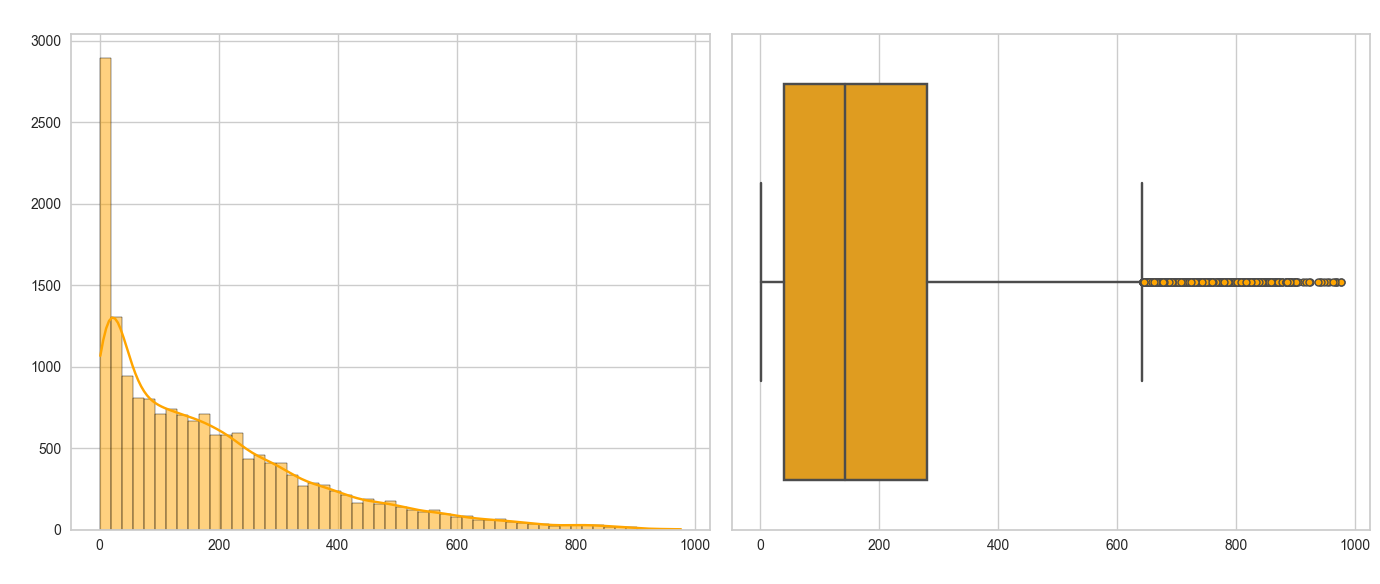

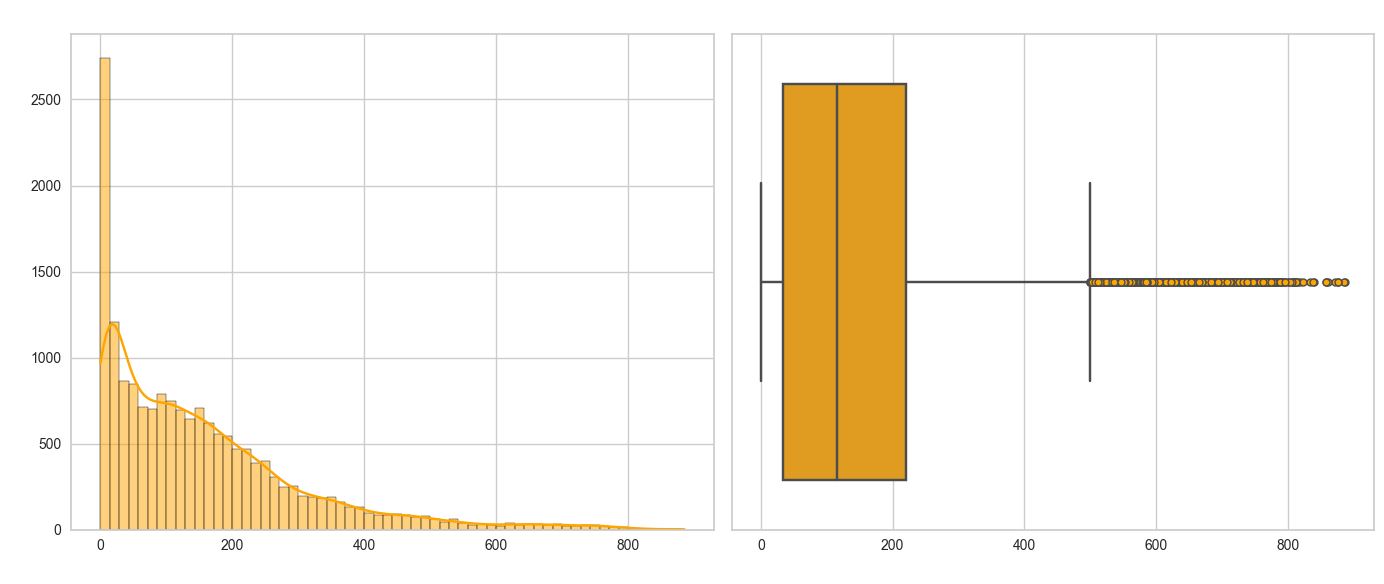

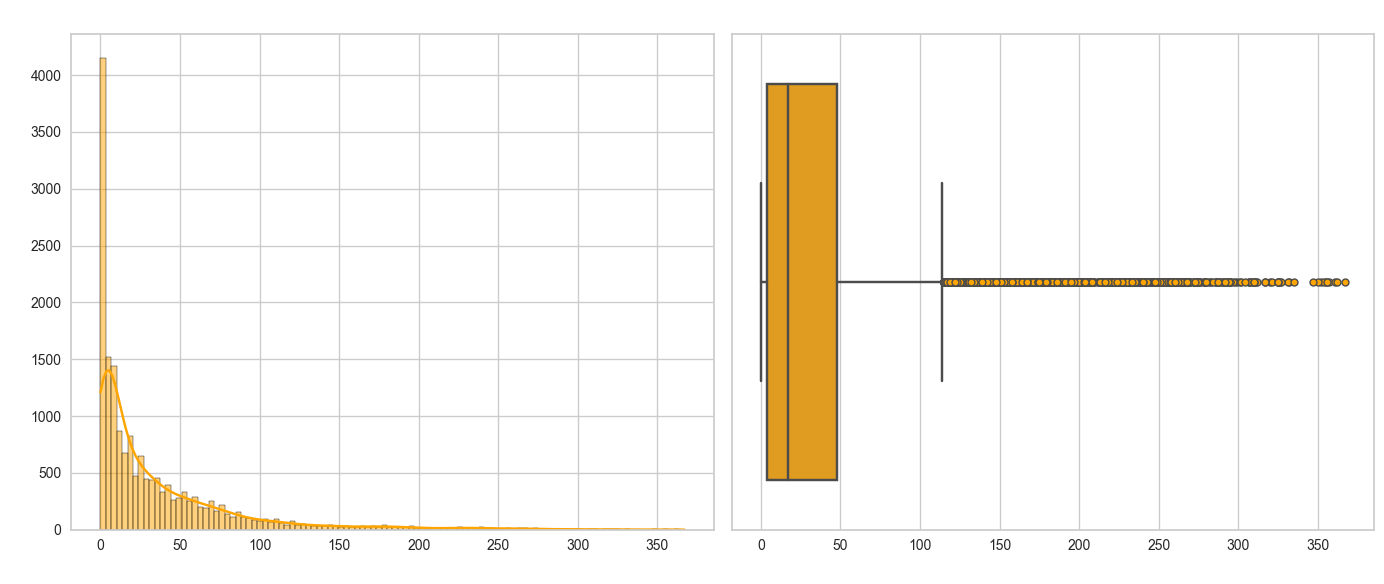

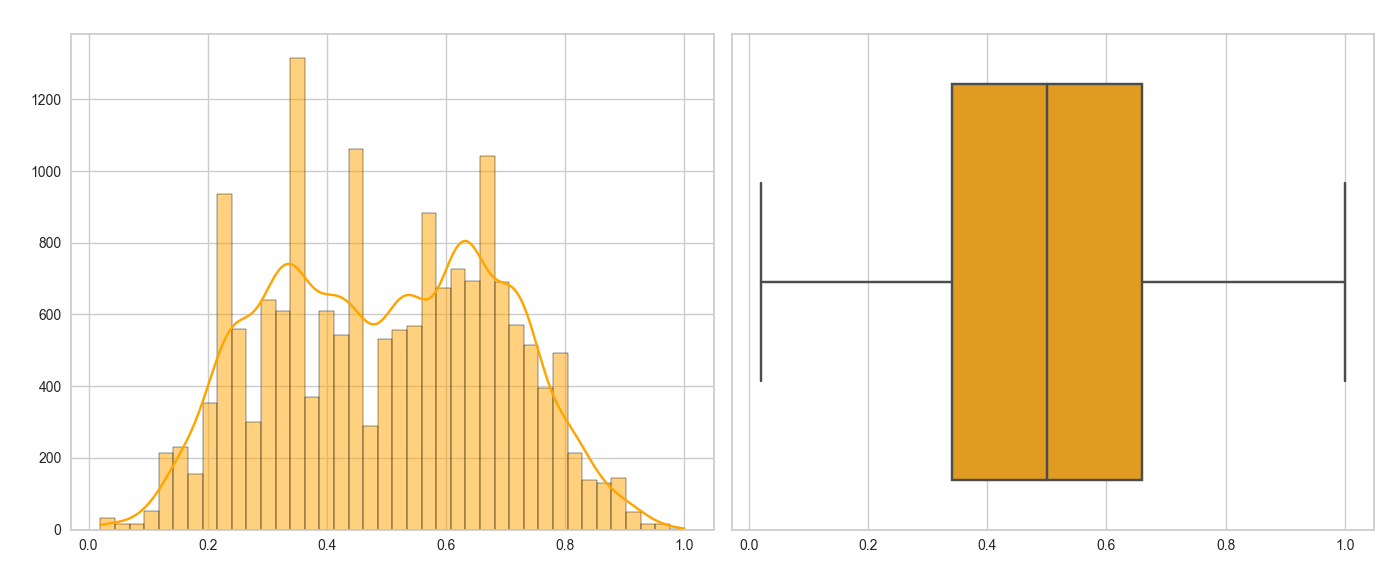

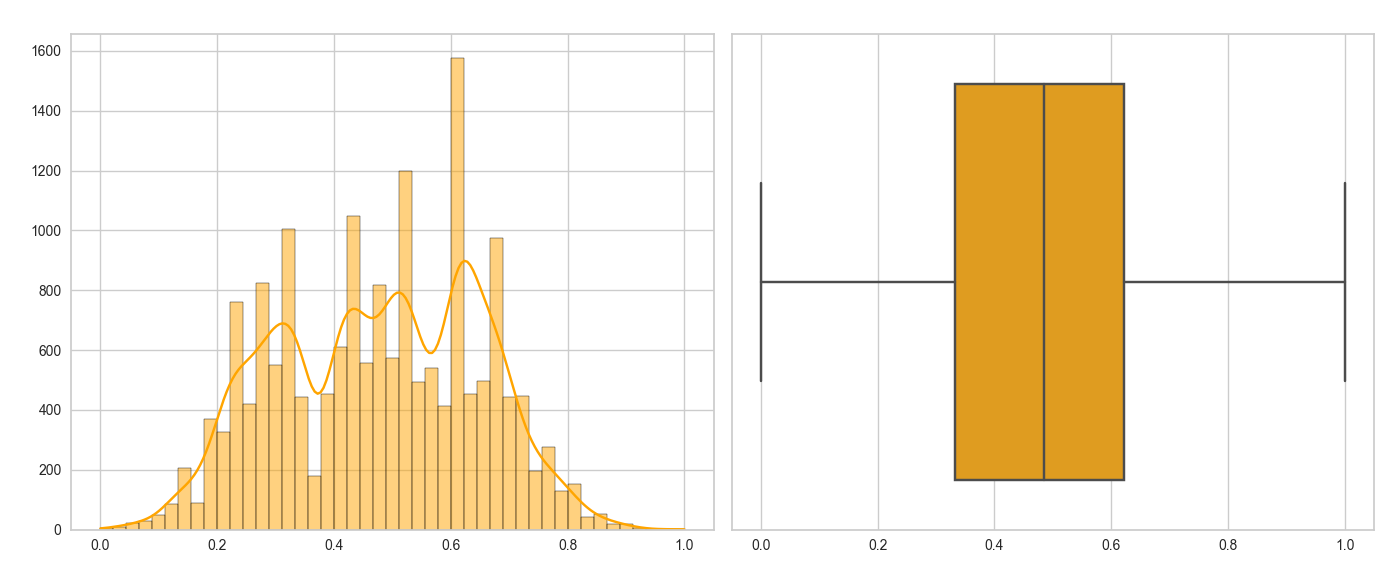

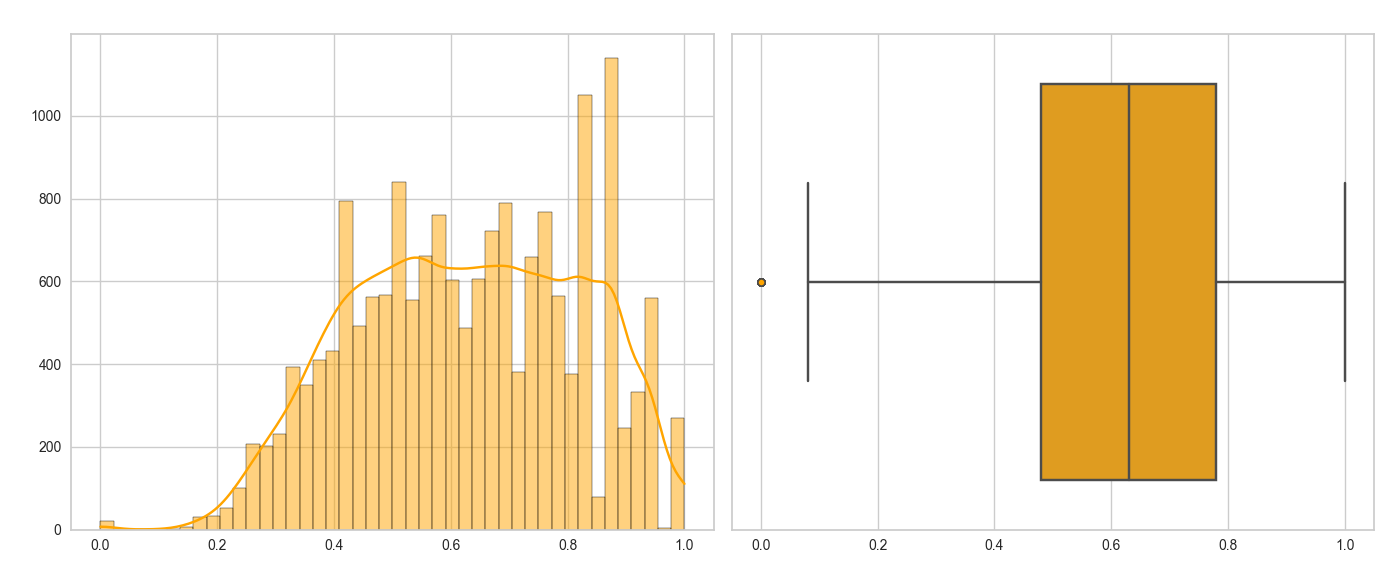

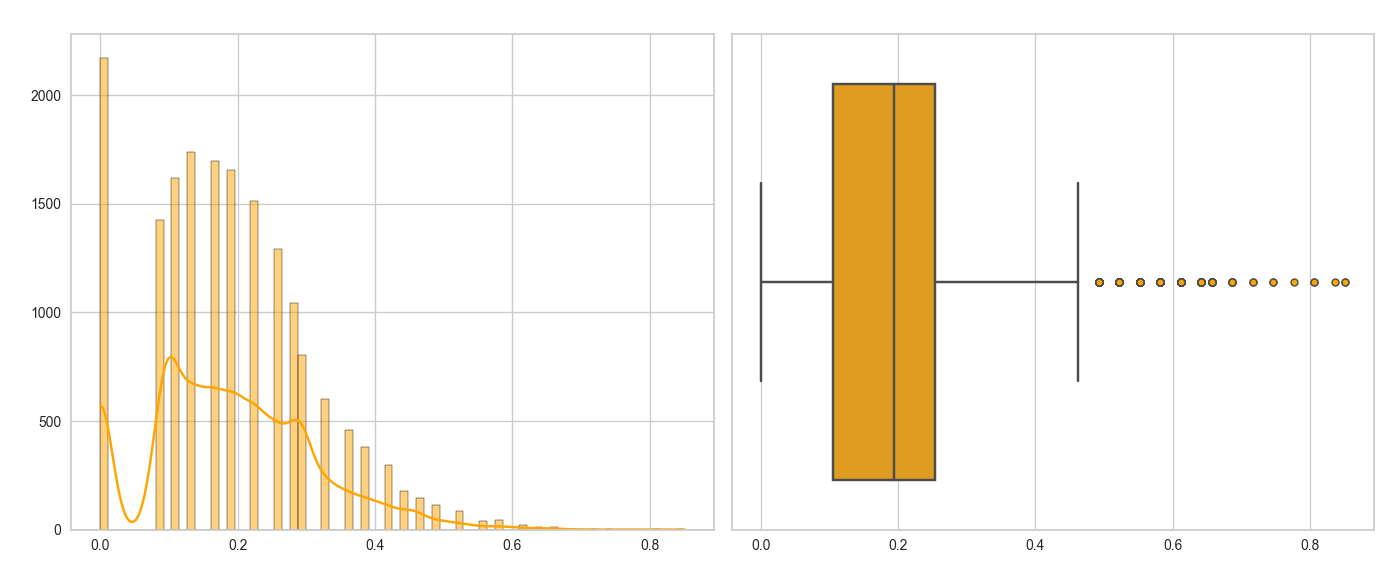

In [19]:
# List of variables for which to create histograms and boxplots
variables = ['cnt', 'registered', 'casual', 'temp', 'atemp', 'hum', 'windspeed']

# Loop through each variable and create the plots
for var in variables:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, color="orange")  # Black color for the bars
    plt.title(f'Histogram of {var.capitalize()}', color='white', fontsize=16)
    plt.xlabel(var.capitalize(), color='white', fontsize=12)
    plt.ylabel('Frequency', color='white', fontsize=12)
    plt.gca().set_facecolor('white')  # Set the background color to white
    
    # Boxplot with outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(
        x=df[var], 
        color="orange",
        flierprops=dict(marker='o', markerfacecolor='orange', markersize=5)  # Black outliers
    )
    plt.title(f'Boxplot of {var.capitalize()}', color='white', fontsize=16)
    plt.xlabel(var.capitalize(), color='white', fontsize=12)
    plt.gca().set_facecolor('white')  # Set the background color to white
    
    plt.tight_layout()
    plt.show()


#### Complete Correlation Matrix

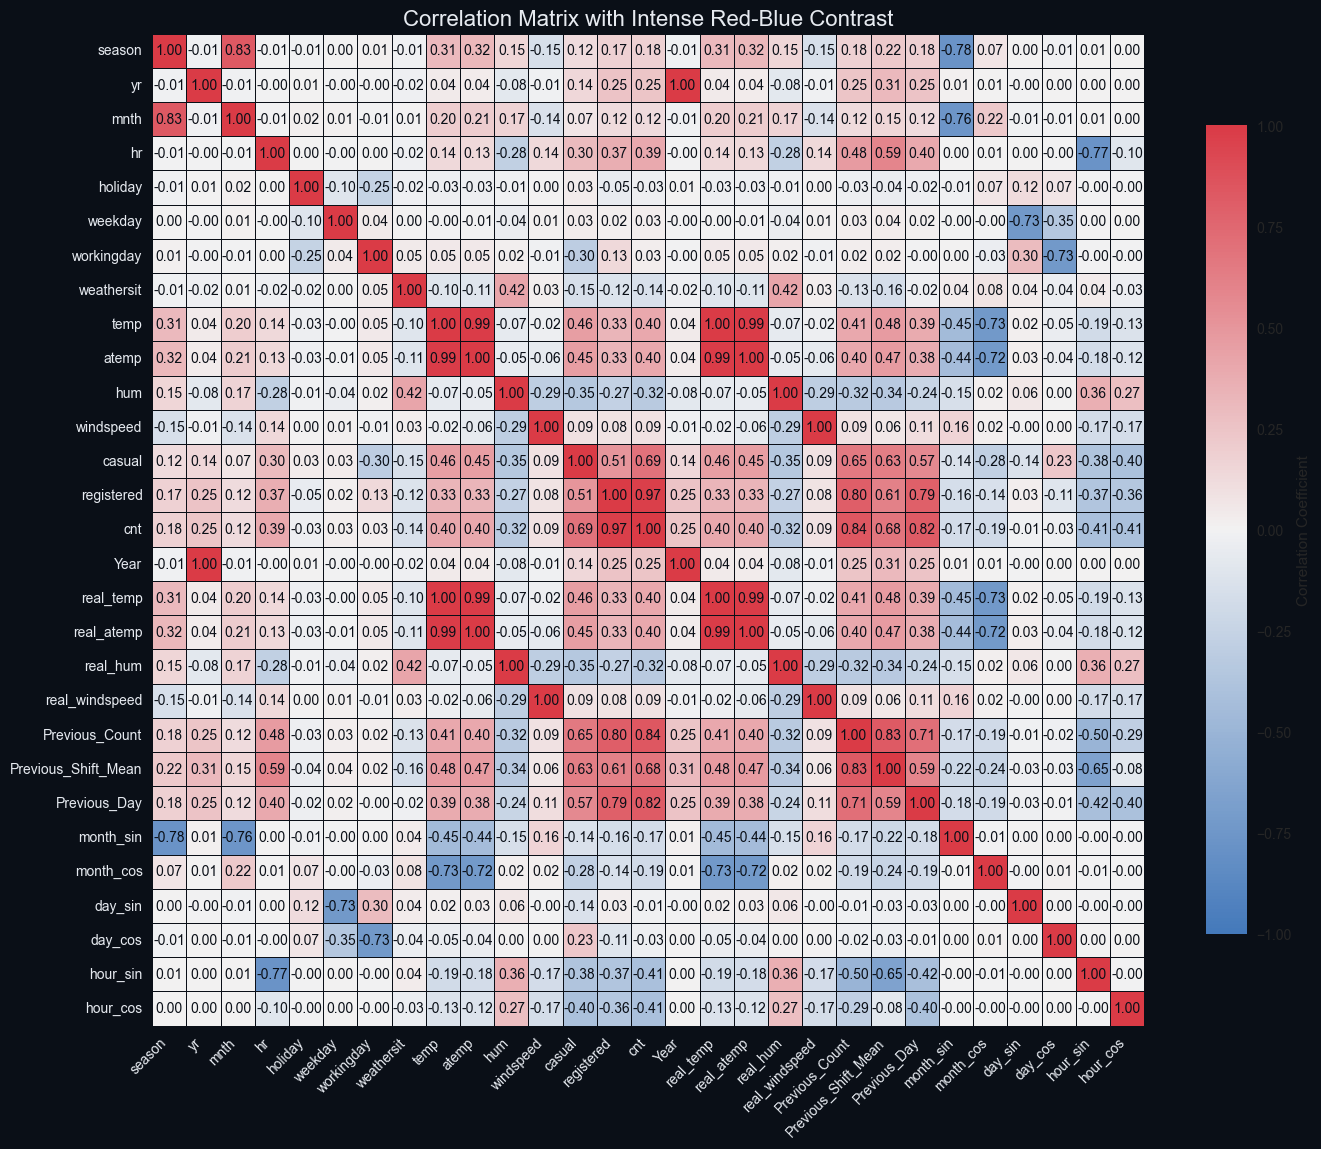

In [20]:
# Filter to include only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure with a dark background
plt.figure(figsize=(16, 14))
plt.gcf().patch.set_facecolor('#0a0f17')  # Set figure background color

# Define a more intense diverging color map from blue to red
cmap = sns.diverging_palette(250, 10, as_cmap=True)  # Intense blue to red

# Draw the heatmap with specified settings
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=cmap, 
    center=0, 
    vmin=-1, 
    vmax=1,
    linewidths=0.5, 
    linecolor="#0a0f17",  # Make line color the same as background
    cbar_kws={"shrink": .75, "label": "Correlation Coefficient"},
    annot_kws={"size": 10, "color": "#0a0f17"},  # Set annotation font color to background for invisibility
    square=True  # Makes cells square-shaped
)

# Set the title with a light font color
plt.title("Correlation Matrix with Intense Red-Blue Contrast", color="#e6eaf0", fontsize=16)

# Set the face color for axes background
plt.gca().set_facecolor('#0a0f17')

# Adjust tick label color to light for readability on dark background
plt.xticks(color="#e6eaf0", rotation=45, ha='right', fontsize=10)
plt.yticks(color="#e6eaf0", fontsize=10)

plt.show()

#### Correlation Matrix (Filtered at Correlation above absolute value of 0.5)

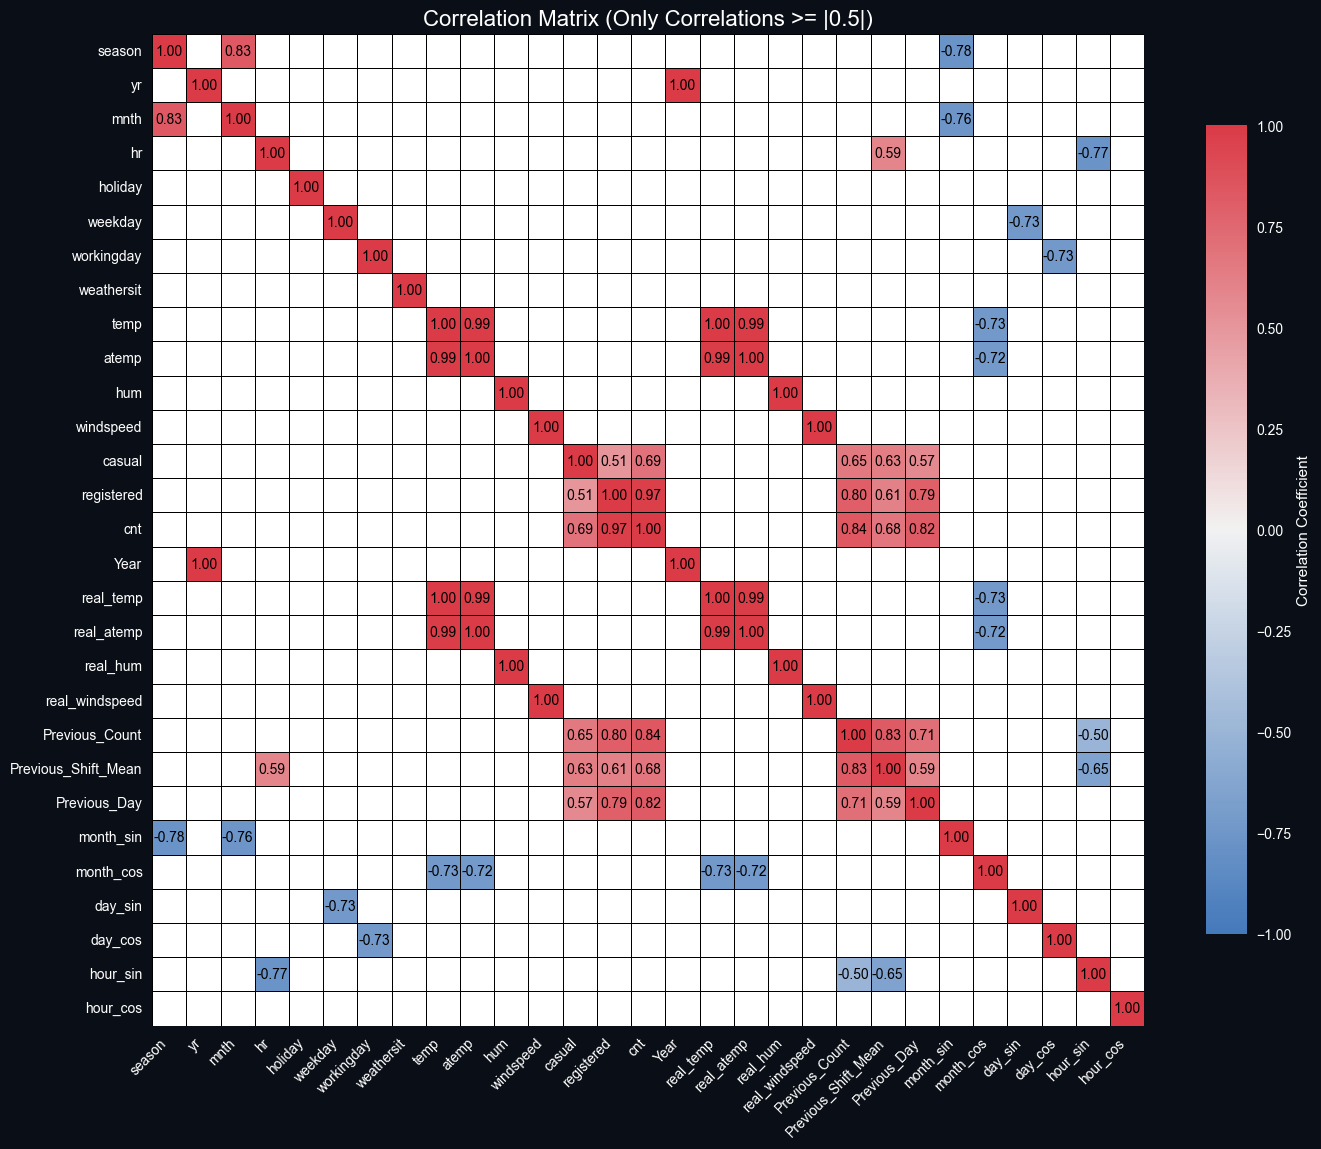

In [21]:
# Filter to include only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask to hide values where correlation is less than 0.5 in magnitude
mask = corr_matrix.abs() < 0.5

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))
plt.gcf().patch.set_facecolor('#0a0f17')  

# Define a more intense diverging color map from blue to red
cmap = sns.diverging_palette(250, 10, as_cmap=True)  # Intense blue to red

# Draw the heatmap with the mask applied
ax = sns.heatmap(
    corr_matrix, 
    mask=mask,  # Apply mask to hide low-correlation cells
    annot=True, 
    fmt=".2f", 
    cmap=cmap, 
    center=0, 
    vmin=-1, 
    vmax=1,
    linewidths=0.5, 
    linecolor="black",  
    cbar_kws={"shrink": .75, "label": "Correlation Coefficient"},  
    annot_kws={"size": 10, "color": "black"},  
    square=True
)

# Set the white background for the heatmap itself
ax.set_facecolor("white")  

# Set the title with a light font color
plt.title("Correlation Matrix (Only Correlations >= |0.5|)", color="white", fontsize=16)

# Adjust tick label color to white for readability on the dark outer background
plt.xticks(color="white", rotation=45, ha='right', fontsize=10)
plt.yticks(color="white", fontsize=10)

# Customize color bar to have white labels
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(colors="white")  # Set color for color bar tick labels
cbar.ax.yaxis.label.set_color("white")  # Set color for color bar label

plt.show()

#### Statistical Interpretations

<div style="background-color: #006400; color: white; padding: 10px; border-radius: 5px;">
Insights:

- The key insights from these stacked bar charts is that the relative share of registered users has increased from 2011 to 2012. This can be best seen in the charts for daily and monthly usage (hence I would pick these two as the charts to present here). 
- In these two charts we can see that the relative usage of the bike sharing service by registered users has increased between (minimum) 2% and (maximum) 8% in the days and months category. 
- This indicates that these are our most valuable target group.
</div>
 

#### Drop-Down Stacked Bar charts Usage-compostion (Registered vs. Casual) for various categories in 2011 and 2012 separately

In [22]:
# Function to calculate average stacked data
def calculate_avg_stacked(df, feature):
    grouped = df.groupby(feature).apply(
        lambda x: pd.Series({
            'casual_pct': (x['casual'] / (x['casual'] + x['registered'])).mean() * 100,
            'registered_pct': (x['registered'] / (x['casual'] + x['registered'])).mean() * 100
        })
    )
    grouped['total_pct'] = grouped['casual_pct'] + grouped['registered_pct']
    grouped['casual_pct'] = grouped['casual_pct'] / grouped['total_pct'] * 100
    grouped['registered_pct'] = grouped['registered_pct'] / grouped['total_pct'] * 100
    return grouped.drop(columns='total_pct')

# Process data by year and feature
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]
features = ['hr', 'shift', 'Day', 'Month', 'quarter', 'seasons', 'workingday', 'holiday', 'Daylight', 'weather']
avg_data_by_feature_2011 = {feature.lower(): calculate_avg_stacked(df_2011, feature) for feature in features}
avg_data_by_feature_2012 = {feature.lower(): calculate_avg_stacked(df_2012, feature) for feature in features}

# Define sorting orders for dropdown alignment
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
quarters_order = ["Q1", "Q2", "Q3", "Q4"]
seasons_order = ["spring", "summer", "fall", "winter"]

avg_data_by_feature_2011['day'] = avg_data_by_feature_2011['day'].reindex(days_order)
avg_data_by_feature_2012['day'] = avg_data_by_feature_2012['day'].reindex(days_order)

avg_data_by_feature_2011['month'] = avg_data_by_feature_2011['month'].reindex(months_order)
avg_data_by_feature_2012['month'] = avg_data_by_feature_2012['month'].reindex(months_order)

avg_data_by_feature_2011['quarter'] = avg_data_by_feature_2011['quarter'].reindex(quarters_order)
avg_data_by_feature_2012['quarter'] = avg_data_by_feature_2012['quarter'].reindex(quarters_order)

avg_data_by_feature_2011['seasons'] = avg_data_by_feature_2011['seasons'].reindex(seasons_order)
avg_data_by_feature_2012['seasons'] = avg_data_by_feature_2012['seasons'].reindex(seasons_order)

# Modified function with year dropdown
def create_stacked_bar_chart(avg_data_by_feature_2011, avg_data_by_feature_2012, title):
    fig = go.Figure()

    # Add initial traces for 2011
    fig.add_trace(go.Bar(
        x=avg_data_by_feature_2011['hr'].index, 
        y=avg_data_by_feature_2011['hr']['casual_pct'], 
        name='Casual Users (2011)',
        marker_color="#000080",
        visible=True
    ))
    fig.add_trace(go.Bar(
        x=avg_data_by_feature_2011['hr'].index, 
        y=avg_data_by_feature_2011['hr']['registered_pct'], 
        base=avg_data_by_feature_2011['hr']['casual_pct'],
        name='Registered Users (2011)',
        marker_color="#004225",
        visible=True
    ))

    # Add traces for 2012, initially hidden
    fig.add_trace(go.Bar(
        x=avg_data_by_feature_2012['hr'].index, 
        y=avg_data_by_feature_2012['hr']['casual_pct'], 
        name='Casual Users (2012)',
        marker_color="#000080",
        visible=False
    ))
    fig.add_trace(go.Bar(
        x=avg_data_by_feature_2012['hr'].index, 
        y=avg_data_by_feature_2012['hr']['registered_pct'], 
        base=avg_data_by_feature_2012['hr']['casual_pct'],
        name='Registered Users (2012)',
        marker_color="#004225",
        visible=False
    ))

    # Define dropdown buttons for year and features
    buttons = [
        dict(label="2011",
             method="update",
             args=[{"visible": [True, True, False, False]},
                   {"title": f"{title} in 2011"}]),
        
        dict(label="2012",
             method="update",
             args=[{"visible": [False, False, True, True]},
                   {"title": f"{title} in 2012"}]),
    ]

    feature_buttons = [
        dict(label="Hour",
             method="update",
             args=[{"x": [avg_data_by_feature_2011['hr'].index, avg_data_by_feature_2011['hr'].index],
                    "y": [avg_data_by_feature_2011['hr']['casual_pct'], avg_data_by_feature_2011['hr']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Hour", "xaxis.title.text": "Hour"}]),
        
        dict(label="Shift",
             method="update",
             args=[{"x": [avg_data_by_feature_2011['shift'].index, avg_data_by_feature_2011['shift'].index],
                    "y": [avg_data_by_feature_2011['shift']['casual_pct'], avg_data_by_feature_2011['shift']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Shift", "xaxis.title.text": "Shift"}]),
    ]

    # Add dropdown menus for selecting year and features
    fig.update_layout(
        updatemenus=[
            dict(buttons=buttons, direction="down", showactive=True, x=0.17, y=1.15, xanchor="left", yanchor="top"),
            dict(buttons=feature_buttons, direction="down", showactive=True, x=0.25, y=1.15, xanchor="left", yanchor="top")
        ],
        title=f"{title} by Hour",
        barmode='stack',
        yaxis=dict(title="Percentage (%)", range=[0, 100]),  
        xaxis=dict(title="Hour"),
        paper_bgcolor="#e6eaf0",
        plot_bgcolor="#e6eaf0",
        font=dict(color="#333333"),
        title_font=dict(size=20, color="#333333"),
    )
    return fig

# Create the stacked bar chart with both years and feature selection
fig = create_stacked_bar_chart(avg_data_by_feature_2011, avg_data_by_feature_2012, "Average Bike Usage")
fig.show()


#### Sum of Weekly Values Time Series

In [23]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 1: Calculate the weekly sum of 'cnt' for 7-day intervals
weekly_total_usage = df.set_index('date').resample('7D')['cnt'].sum().reset_index()
weekly_total_usage.columns = ['date', 'total_weekly_usage']  # Rename columns for clarity

# Step 2: Create the time series line chart with vertical lines at each weekly interval
fig = go.Figure()

# Add main line for total weekly usage
fig.add_trace(go.Scatter(
    x=weekly_total_usage['date'], 
    y=weekly_total_usage['total_weekly_usage'], 
    mode='lines+markers',
    line=dict(color='#800020', width=2),  # Burgundy red line for total weekly usage
    marker=dict(size=6),  # Markers to highlight each data point
    name='Total Weekly Usage'))

# Add vertical lines for each week
for i, row in weekly_total_usage.iterrows():
    fig.add_shape(
        type="line",
        x0=row['date'], y0=0,
        x1=row['date'], y1=row['total_weekly_usage'],
        line=dict(color="gray", width=1, dash="dot")
    )

# Step 3: Customize layout
fig.update_layout(
    title="Total Weekly Usage Over Time with Weekly Intervals",
    xaxis_title="Date",
    yaxis_title="Total Usage Count",
    paper_bgcolor="#e6eaf0",
    plot_bgcolor="#e6eaf0",
    font=dict(color="black"),
    title_font=dict(size=20, color="black"),
    xaxis=dict(
        showgrid=True,
        gridcolor="lightgray",
        linecolor="black",),
    yaxis=dict(
        showgrid=True,
        gridcolor="lightgray",
        linecolor="black",  
        zeroline=True,     
        zerolinecolor="black",),
)

# Show the figure
fig.show()

#### Distribution of Type of User Time Series

In [24]:
# Create a temporary column for registered percentage
df['registered_percentage'] = (df['registered'] / df['cnt']) * 100

# Separate data by year
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]

# Calculate the mean registered percentage by each time unit
def calculate_registered_percentage(df, time_unit):
    return df.groupby(time_unit)['registered_percentage'].mean()

# Initialize figure
fig = go.Figure()

# Add initial trace for the "hour" time unit with different line styles
fig.add_trace(go.Scatter(
    x=calculate_registered_percentage(df_2011, 'hr').index,
    y=calculate_registered_percentage(df_2011, 'hr').values,
    mode='lines+markers',
    name='2011',
    line=dict(color='#004225', width=2, dash='dot'),  # Dotted line for 2011 in British racing green
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    x=calculate_registered_percentage(df_2012, 'hr').index,
    y=calculate_registered_percentage(df_2012, 'hr').values,
    mode='lines+markers',
    name='2012',
    line=dict(color='#004225', width=2),  # Solid line for 2012 in British racing green
    marker=dict(size=6)
))

# Define dropdown buttons for each time unit
buttons = [
    dict(label="Hour",
         method="update",
         args=[{"x": [calculate_registered_percentage(df_2011, 'hr').index, calculate_registered_percentage(df_2012, 'hr').index],
                "y": [calculate_registered_percentage(df_2011, 'hr').values, calculate_registered_percentage(df_2012, 'hr').values]},
               {"title": "Registered Users Percentage by Hour", "xaxis.title.text": "Hour"}]),
    
    dict(label="Day of the Week",
         method="update",
         args=[{"x": [calculate_registered_percentage(df_2011, 'Day').index, calculate_registered_percentage(df_2012, 'Day').index],
                "y": [calculate_registered_percentage(df_2011, 'Day').values, calculate_registered_percentage(df_2012, 'Day').values]},
               {"title": "Registered Users Percentage by Day of the Week", "xaxis.title.text": "Day of the Week"}]),
    
    dict(label="Shift",
         method="update",
         args=[{"x": [calculate_registered_percentage(df_2011, 'shift').index, calculate_registered_percentage(df_2012, 'shift').index],
                "y": [calculate_registered_percentage(df_2011, 'shift').values, calculate_registered_percentage(df_2012, 'shift').values]},
               {"title": "Registered Users Percentage by Shift", "xaxis.title.text": "Shift"}]),
    
    dict(label="Month",
         method="update",
         args=[{"x": [calculate_registered_percentage(df_2011, 'Month').index, calculate_registered_percentage(df_2012, 'Month').index],
                "y": [calculate_registered_percentage(df_2011, 'Month').values, calculate_registered_percentage(df_2012, 'Month').values]},
               {"title": "Registered Users Percentage by Month", "xaxis.title.text": "Month"}]),
    
    dict(label="Season",
         method="update",
         args=[{"x": [calculate_registered_percentage(df_2011, 'seasons').index, calculate_registered_percentage(df_2012, 'seasons').index],
                "y": [calculate_registered_percentage(df_2011, 'seasons').values, calculate_registered_percentage(df_2012, 'seasons').values]},
               {"title": "Registered Users Percentage by Season", "xaxis.title.text": "Season"}]),
    
    dict(label="Quarter",
         method="update",
         args=[{"x": [calculate_registered_percentage(df_2011, 'quarter').index, calculate_registered_percentage(df_2012, 'quarter').index],
                "y": [calculate_registered_percentage(df_2011, 'quarter').values, calculate_registered_percentage(df_2012, 'quarter').values]},
               {"title": "Registered Users Percentage by Quarter", "xaxis.title.text": "Quarter"}]),
    
    dict(label="Year",
         method="update",
         args=[{"x": [calculate_registered_percentage(df_2011, 'Year').index, calculate_registered_percentage(df_2012, 'Year').index],
                "y": [calculate_registered_percentage(df_2011, 'Year').values, calculate_registered_percentage(df_2012, 'Year').values]},
               {"title": "Registered Users Percentage by Year", "xaxis.title.text": "Year"}]),
]

# Update layout with dropdown menu
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.17, y=1.15, xanchor="left", yanchor="top"
    )],
    title="Registered Users Percentage by Hour",
    xaxis_title="Hour",
    yaxis_title="Percentage (%)",
    yaxis=dict(range=[70, 95]),
    paper_bgcolor="#e6eaf0",
    plot_bgcolor="#e6eaf0",
    font=dict(color="black"),
    title_font=dict(size=20, color="black")
)

# Drop the temporary column after plotting
df.drop(columns='registered_percentage', inplace=True)

# Show the figure
fig.show()


#### Stacked Bar Chart of Type of Users

In [25]:
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]

def calculate_avg_stacked(df, feature):
    grouped = df.groupby(feature).apply(
        lambda x: pd.Series({
            'casual_pct': (x['casual'] / (x['casual'] + x['registered'])).mean() * 100,
            'registered_pct': (x['registered'] / (x['casual'] + x['registered'])).mean() * 100
        })
    )
    grouped['total_pct'] = grouped['casual_pct'] + grouped['registered_pct']
    grouped['casual_pct'] = grouped['casual_pct'] / grouped['total_pct'] * 100
    grouped['registered_pct'] = grouped['registered_pct'] / grouped['total_pct'] * 100
    return grouped.drop(columns='total_pct') 

features = ['hr', 'shift', 'Day', 'Month', 'quarter', 'seasons', 'workingday', 'holiday', 'Daylight', 'weather']
avg_data_by_feature_2011 = {feature.lower(): calculate_avg_stacked(df_2011, feature) for feature in features}
avg_data_by_feature_2012 = {feature.lower(): calculate_avg_stacked(df_2012, feature) for feature in features}

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
quarters_order = ["Q1", "Q2", "Q3", "Q4"]
seasons_order = ["spring", "summer", "fall", "winter"]

avg_data_by_feature_2011['day'] = avg_data_by_feature_2011['day'].reindex(days_order)
avg_data_by_feature_2012['day'] = avg_data_by_feature_2012['day'].reindex(days_order)

avg_data_by_feature_2011['month'] = avg_data_by_feature_2011['month'].reindex(months_order)
avg_data_by_feature_2012['month'] = avg_data_by_feature_2012['month'].reindex(months_order)

avg_data_by_feature_2011['quarter'] = avg_data_by_feature_2011['quarter'].reindex(quarters_order)
avg_data_by_feature_2012['quarter'] = avg_data_by_feature_2012['quarter'].reindex(quarters_order)

avg_data_by_feature_2011['seasons'] = avg_data_by_feature_2011['seasons'].reindex(seasons_order)
avg_data_by_feature_2012['seasons'] = avg_data_by_feature_2012['seasons'].reindex(seasons_order)

def create_stacked_bar_chart_for_year(avg_data_by_feature, title):
    fig_year = go.Figure()
    
    # Add initial plot for 'Hour'
    fig_year.add_trace(go.Bar(
        x=avg_data_by_feature['hr'].index, 
        y=avg_data_by_feature['hr']['casual_pct'], 
        name='Casual Users',
        marker_color="#000080",  # Royal blue for Casual users
        text=avg_data_by_feature['hr']['casual_pct'].apply(lambda x: f"{x:.1f}%"),
        hoverinfo="text",
        textfont=dict(color="white")  # White font for text in blue bars
    ))
    fig_year.add_trace(go.Bar(
        x=avg_data_by_feature['hr'].index, 
        y=avg_data_by_feature['hr']['registered_pct'], 
        base=avg_data_by_feature['hr']['casual_pct'],
        name='Registered Users',
        marker_color="#004225",  # British racing green for Registered users
        text=avg_data_by_feature['hr']['registered_pct'].apply(lambda x: f"{x:.1f}%"),
        hoverinfo="text"
    ))

    # Define dropdown buttons for each feature with dynamic x-axis title
    buttons = [
        dict(label="Hour",
             method="update",
             args=[{"x": [avg_data_by_feature['hr'].index, avg_data_by_feature['hr'].index],
                    "y": [avg_data_by_feature['hr']['casual_pct'], avg_data_by_feature['hr']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Hour", "xaxis.title.text": "Hour"}]),
        
        dict(label="Shift",
             method="update",
             args=[{"x": [avg_data_by_feature['shift'].index, avg_data_by_feature['shift'].index],
                    "y": [avg_data_by_feature['shift']['casual_pct'], avg_data_by_feature['shift']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Shift", "xaxis.title.text": "Shift"}]),
        
        dict(label="Day",
             method="update",
             args=[{"x": [avg_data_by_feature['day'].index, avg_data_by_feature['day'].index],
                    "y": [avg_data_by_feature['day']['casual_pct'], avg_data_by_feature['day']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Day", "xaxis.title.text": "Day"}]),
        
        dict(label="Month",
             method="update",
             args=[{"x": [avg_data_by_feature['month'].index, avg_data_by_feature['month'].index],
                    "y": [avg_data_by_feature['month']['casual_pct'], avg_data_by_feature['month']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Month", "xaxis.title.text": "Month"}]),
        
        dict(label="Quarter",
             method="update",
             args=[{"x": [avg_data_by_feature['quarter'].index, avg_data_by_feature['quarter'].index],
                    "y": [avg_data_by_feature['quarter']['casual_pct'], avg_data_by_feature['quarter']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Quarter", "xaxis.title.text": "Quarter"}]),
        
        dict(label="Seasons",
             method="update",
             args=[{"x": [avg_data_by_feature['seasons'].index, avg_data_by_feature['seasons'].index],
                    "y": [avg_data_by_feature['seasons']['casual_pct'], avg_data_by_feature['seasons']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Seasons", "xaxis.title.text": "Seasons"}]),
        
        dict(label="Working Day",
             method="update",
             args=[{"x": [avg_data_by_feature['workingday'].index, avg_data_by_feature['workingday'].index],
                    "y": [avg_data_by_feature['workingday']['casual_pct'], avg_data_by_feature['workingday']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Working Day", "xaxis.title.text": "Working Day"}]),
        
        dict(label="Holiday",
             method="update",
             args=[{"x": [avg_data_by_feature['holiday'].index, avg_data_by_feature['holiday'].index],
                    "y": [avg_data_by_feature['holiday']['casual_pct'], avg_data_by_feature['holiday']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Holiday", "xaxis.title.text": "Holiday"}]),
        
        dict(label="Daylight",
             method="update",
             args=[{"x": [avg_data_by_feature['daylight'].index, avg_data_by_feature['daylight'].index],
                    "y": [avg_data_by_feature['daylight']['casual_pct'], avg_data_by_feature['daylight']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Daylight", "xaxis.title.text": "Daylight"}]),
        
        dict(label="Weather",
             method="update",
             args=[{"x": [avg_data_by_feature['weather'].index, avg_data_by_feature['weather'].index],
                    "y": [avg_data_by_feature['weather']['casual_pct'], avg_data_by_feature['weather']['registered_pct']],
                    "type": "bar"},
                   {"title": f"{title} by Weather", "xaxis.title.text": "Weather"}]),
    ]

    # Add dropdown menu and styling
    fig_year.update_layout(
        updatemenus=[dict(
            buttons=buttons,
            direction="down",
            showactive=True
        )],
        title=f"{title} by Hour",
        barmode='stack',
        yaxis=dict(title="Percentage (%)", range=[0, 100]),  
        xaxis=dict(title="Hour"), 
        paper_bgcolor="#e6eaf0",  
        plot_bgcolor="#e6eaf0",
        font=dict(color="#333333"),  
        title_font=dict(size=20, color="#333333"),
    )
    return fig_year

# Create stacked bar charts for 2011 and 2012
fig_2011 = create_stacked_bar_chart_for_year(avg_data_by_feature_2011, "Average Bike Usage in 2011")
fig_2011.show()

fig_2012 = create_stacked_bar_chart_for_year(avg_data_by_feature_2012, "Average Bike Usage in 2012")
fig_2012.show()


#### Drop-Down Bar charts showing average usage (split between registered and casual) for various categories in 2011 and 2012 separately

In [26]:
# Filter data by year
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]

# Function to calculate average values for casual and registered users
def calculate_avg_absolute(df, feature):
    grouped = df.groupby(feature).apply(
        lambda x: pd.Series({
            'casual_avg': x['casual'].mean(),
            'registered_avg': x['registered'].mean()
        })
    )
    return grouped

# Calculate the averages for each feature for 2011 and 2012
features = ['hr', 'shift', 'Day', 'Month', 'quarter', 'seasons', 'workingday', 'holiday', 'Daylight', 'weather']
avg_data_by_feature_2011 = {feature.lower(): calculate_avg_absolute(df_2011, feature) for feature in features}
avg_data_by_feature_2012 = {feature.lower(): calculate_avg_absolute(df_2012, feature) for feature in features}

# Define the natural order for reordering categorical variables
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
quarters_order = ["Q1", "Q2", "Q3", "Q4"]
seasons_order = ["spring", "summer", "fall", "winter"]

# Reorder data as necessary
avg_data_by_feature_2011['day'] = avg_data_by_feature_2011['day'].reindex(days_order)
avg_data_by_feature_2012['day'] = avg_data_by_feature_2012['day'].reindex(days_order)

avg_data_by_feature_2011['month'] = avg_data_by_feature_2011['month'].reindex(months_order)
avg_data_by_feature_2012['month'] = avg_data_by_feature_2012['month'].reindex(months_order)

avg_data_by_feature_2011['quarter'] = avg_data_by_feature_2011['quarter'].reindex(quarters_order)
avg_data_by_feature_2012['quarter'] = avg_data_by_feature_2012['quarter'].reindex(quarters_order)

avg_data_by_feature_2011['seasons'] = avg_data_by_feature_2011['seasons'].reindex(seasons_order)
avg_data_by_feature_2012['seasons'] = avg_data_by_feature_2012['seasons'].reindex(seasons_order)

def create_absolute_bar_chart_for_year(avg_data_by_feature, title):
    fig_year = go.Figure()
    
    # Add initial plot for 'Hour'
    fig_year.add_trace(go.Bar(
        x=avg_data_by_feature['hr'].index, 
        y=avg_data_by_feature['hr']['casual_avg'], 
        name='Casual Users',
        marker_color="#000080",  # Royal blue for Casual users
        text=avg_data_by_feature['hr']['casual_avg'].apply(lambda x: f"{x:.1f}"),
        textposition="outside",  # Position text above the bars
        textfont=dict(color="black"),  
        hoverinfo="text"
    ))
    fig_year.add_trace(go.Bar(
        x=avg_data_by_feature['hr'].index, 
        y=avg_data_by_feature['hr']['registered_avg'], 
        name='Registered Users',
        marker_color="#004225",  # British racing green for Registered users
        text=avg_data_by_feature['hr']['registered_avg'].apply(lambda x: f"{x:.1f}"),
        textposition="outside",  # Position text above the bars
        textfont=dict(color="black"),  
        hoverinfo="text"
    ))

    # Define dropdown buttons for each feature with dynamic x-axis title
    buttons = [
        dict(label="Hour",
             method="update",
             args=[{"x": [avg_data_by_feature['hr'].index, avg_data_by_feature['hr'].index],
                    "y": [avg_data_by_feature['hr']['casual_avg'], avg_data_by_feature['hr']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Hour", "xaxis.title.text": "Hour"}]),
        
        dict(label="Shift",
             method="update",
             args=[{"x": [avg_data_by_feature['shift'].index, avg_data_by_feature['shift'].index],
                    "y": [avg_data_by_feature['shift']['casual_avg'], avg_data_by_feature['shift']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Shift", "xaxis.title.text": "Shift"}]),
        
        dict(label="Day",
             method="update",
             args=[{"x": [avg_data_by_feature['day'].index, avg_data_by_feature['day'].index],
                    "y": [avg_data_by_feature['day']['casual_avg'], avg_data_by_feature['day']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Day", "xaxis.title.text": "Day"}]),
        
        dict(label="Month",
             method="update",
             args=[{"x": [avg_data_by_feature['month'].index, avg_data_by_feature['month'].index],
                    "y": [avg_data_by_feature['month']['casual_avg'], avg_data_by_feature['month']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Month", "xaxis.title.text": "Month"}]),
        
        dict(label="Quarter",
             method="update",
             args=[{"x": [avg_data_by_feature['quarter'].index, avg_data_by_feature['quarter'].index],
                    "y": [avg_data_by_feature['quarter']['casual_avg'], avg_data_by_feature['quarter']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Quarter", "xaxis.title.text": "Quarter"}]),
        
        dict(label="Seasons",
             method="update",
             args=[{"x": [avg_data_by_feature['seasons'].index, avg_data_by_feature['seasons'].index],
                    "y": [avg_data_by_feature['seasons']['casual_avg'], avg_data_by_feature['seasons']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Seasons", "xaxis.title.text": "Seasons"}]),
        
        dict(label="Working Day",
             method="update",
             args=[{"x": [avg_data_by_feature['workingday'].index, avg_data_by_feature['workingday'].index],
                    "y": [avg_data_by_feature['workingday']['casual_avg'], avg_data_by_feature['workingday']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Working Day", "xaxis.title.text": "Working Day"}]),
        
        dict(label="Holiday",
             method="update",
             args=[{"x": [avg_data_by_feature['holiday'].index, avg_data_by_feature['holiday'].index],
                    "y": [avg_data_by_feature['holiday']['casual_avg'], avg_data_by_feature['holiday']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Holiday", "xaxis.title.text": "Holiday"}]),
        
        dict(label="Daylight",
             method="update",
             args=[{"x": [avg_data_by_feature['daylight'].index, avg_data_by_feature['daylight'].index],
                    "y": [avg_data_by_feature['daylight']['casual_avg'], avg_data_by_feature['daylight']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Daylight", "xaxis.title.text": "Daylight"}]),
        
        dict(label="Weather",
             method="update",
             args=[{"x": [avg_data_by_feature['weather'].index, avg_data_by_feature['weather'].index],
                    "y": [avg_data_by_feature['weather']['casual_avg'], avg_data_by_feature['weather']['registered_avg']],
                    "type": "bar"},
                   {"title": f"{title} by Weather", "xaxis.title.text": "Weather"}]),
    ]

    # Add dropdown menu and styling
    fig_year.update_layout(
        updatemenus=[dict(
            buttons=buttons,
            direction="down",
            showactive=True
        )],
        title=f"{title} by Hour",
        barmode='group',  
        yaxis=dict(title="Average Count"),  
        xaxis=dict(title="Hour"),  
        paper_bgcolor="#e6eaf0",  
        plot_bgcolor="#e6eaf0",
        font=dict(color="#333333"),  
        title_font=dict(size=20, color="#333333"),
    )
    return fig_year

# Create bar charts for 2011 and 2012
fig_2011 = create_absolute_bar_chart_for_year(avg_data_by_feature_2011, "Average Bike Usage in 2011")
fig_2011.show()

fig_2012 = create_absolute_bar_chart_for_year(avg_data_by_feature_2012, "Average Bike Usage in 2012")
fig_2012.show()


#### Time Series and Bar Charts Interpretations

<div style="background-color: #006400; color: white; padding: 10px; border-radius: 5px;">
Insights:

- From these bar charts, I feel like the key takeaway is that, overall, the usage has drastically increasd from 2011 to 2012. 
- Virtually all absolute usage numbers have increased signficantly (the composition of said usage is better analysed from the stacked bar charts above). 
- Here, we would just show the hourly bar chart figures to showcase the increase in usage over time, but technically this could also be done in the heatmaps (althought the bar charts are easier to use for this purpose).
</div>



#### Line Chart (Drop-Down) of Total Usage (Cnt) Time Series

In [27]:
# Separate data by year
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]

# Calculate the mean total usage (cnt) by each time unit
def calculate_total_usage(df, time_unit):
    return df.groupby(time_unit)['cnt'].mean()


fig = go.Figure()

# Add initial trace for the "hour" time unit with different line styles
fig.add_trace(go.Scatter(
    x=calculate_total_usage(df_2011, 'hr').index,
    y=calculate_total_usage(df_2011, 'hr').values,
    mode='lines+markers',
    name='2011',
    line=dict(color='#800020', width=2, dash='dot'),  # Burgundy red dotted line for 2011
    marker=dict(size=6)
))

fig.add_trace(go.Scatter(
    x=calculate_total_usage(df_2012, 'hr').index,
    y=calculate_total_usage(df_2012, 'hr').values,
    mode='lines+markers',
    name='2012',
    line=dict(color='#800020', width=2),  # Solid burgundy red line for 2012
    marker=dict(size=6)
))

# Define dropdown buttons for each time unit
buttons = [
    dict(label="Hour",
         method="update",
         args=[{"x": [calculate_total_usage(df_2011, 'hr').index, calculate_total_usage(df_2012, 'hr').index],
                "y": [calculate_total_usage(df_2011, 'hr').values, calculate_total_usage(df_2012, 'hr').values]},
               {"title": "Total Usage by Hour", "xaxis.title.text": "Hour"}]),
    
    dict(label="Day of the Week",
         method="update",
         args=[{"x": [calculate_total_usage(df_2011, 'Day').index, calculate_total_usage(df_2012, 'Day').index],
                "y": [calculate_total_usage(df_2011, 'Day').values, calculate_total_usage(df_2012, 'Day').values]},
               {"title": "Total Usage by Day of the Week", "xaxis.title.text": "Day of the Week"}]),
    
    dict(label="Shift",
         method="update",
         args=[{"x": [calculate_total_usage(df_2011, 'shift').index, calculate_total_usage(df_2012, 'shift').index],
                "y": [calculate_total_usage(df_2011, 'shift').values, calculate_total_usage(df_2012, 'shift').values]},
               {"title": "Total Usage by Shift", "xaxis.title.text": "Shift"}]),
    
    dict(label="Month",
         method="update",
         args=[{"x": [calculate_total_usage(df_2011, 'Month').index, calculate_total_usage(df_2012, 'Month').index],
                "y": [calculate_total_usage(df_2011, 'Month').values, calculate_total_usage(df_2012, 'Month').values]},
               {"title": "Total Usage by Month", "xaxis.title.text": "Month"}]),
    
    dict(label="Season",
         method="update",
         args=[{"x": [calculate_total_usage(df_2011, 'seasons').index, calculate_total_usage(df_2012, 'seasons').index],
                "y": [calculate_total_usage(df_2011, 'seasons').values, calculate_total_usage(df_2012, 'seasons').values]},
               {"title": "Total Usage by Season", "xaxis.title.text": "Season"}]),
    
    dict(label="Quarter",
         method="update",
         args=[{"x": [calculate_total_usage(df_2011, 'quarter').index, calculate_total_usage(df_2012, 'quarter').index],
                "y": [calculate_total_usage(df_2011, 'quarter').values, calculate_total_usage(df_2012, 'quarter').values]},
               {"title": "Total Usage by Quarter", "xaxis.title.text": "Quarter"}]),
    
    dict(label="Year",
         method="update",
         args=[{"x": [calculate_total_usage(df_2011, 'Year').index, calculate_total_usage(df_2012, 'Year').index],
                "y": [calculate_total_usage(df_2011, 'Year').values, calculate_total_usage(df_2012, 'Year').values]},
               {"title": "Total Usage by Year", "xaxis.title.text": "Year"}]),
]

# Update layout with dropdown menu and custom settings
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.17, y=1.15, xanchor="left", yanchor="top"
    )],
    title="Total Usage by Hour",
    xaxis_title="Hour",
    yaxis_title="Average Count",
    paper_bgcolor="#e6eaf0",
    plot_bgcolor="#e6eaf0",
    font=dict(color="black"),
    title_font=dict(size=20, color="black"),
)

# Show the figure
fig.show()

#### Bike Usage with Dynamic Granularity

In [28]:
# Prepare average bike usage data for different categories
avg_by_hour = df.groupby('hr')['cnt'].mean()
avg_by_shift = df.groupby('shift')['cnt'].mean()
avg_by_day = df.groupby('Day')['cnt'].mean()
avg_by_month = df.groupby('Month')['cnt'].mean()
avg_by_quarter = df.groupby('quarter')['cnt'].mean()
avg_by_season = df.groupby('seasons')['cnt'].mean()
avg_by_year = df.groupby('Year')['cnt'].mean()
avg_by_working_day = df.groupby('workingday')['cnt'].mean()
avg_by_holiday = df.groupby('holiday')['cnt'].mean()

# Define the natural order for days, months, quarters, and seasons
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
seasons_order = ["spring", "summer", "fall", "winter"]
quarters_order = ["Q1", "Q2", "Q3", "Q4"]

# Reorder indexes based on natural order
avg_by_day = avg_by_day.reindex(days_order)
avg_by_month = avg_by_month.reindex(months_order)
avg_by_season = avg_by_season.reindex(seasons_order)
avg_by_quarter = avg_by_quarter.reindex(quarters_order)

# Initialize the figure with a gray background and custom styling
fig = go.Figure()

# Add a default trace (e.g., by hour) as a line chart
fig.add_trace(go.Scatter(
    x=avg_by_hour.index, 
    y=avg_by_hour.values, 
    name='Hour', 
    mode='lines+markers+text',  # Adds lines, markers, and text annotations
    line=dict(color="maroon", width=4),  # Burgundy red line color with thicker line width
    marker=dict(size=8),  # Increase marker size for better visibility
    text=[f"{val:.1f}" for val in avg_by_hour.values],  # Display values on dots
    textposition="top center"   # Position values above dots
))

# Add dropdown menu for selecting different views in specified order
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Hour",
                     method="update",
                     args=[{"y": [avg_by_hour.values], "x": [avg_by_hour.index], "type": "scatter"},
                           {"title": "Average Bike Usage per Hour", "xaxis.title.text": "Hour"}]),
                
                dict(label="Shift",
                     method="update",
                     args=[{"y": [avg_by_shift.values], "x": [avg_by_shift.index], "type": "scatter"},
                           {"title": "Average Bike Usage by Shift", "xaxis.title.text": "Shift"}]),
                
                dict(label="Day of the Week",
                     method="update",
                     args=[{"y": [avg_by_day.values], "x": [avg_by_day.index], "type": "scatter"},
                           {"title": "Average Bike Usage by Day of the Week", "xaxis.title.text": "Day of the Week"}]),
                
                dict(label="Month",
                     method="update",
                     args=[{"y": [avg_by_month.values], "x": [avg_by_month.index], "type": "scatter"},
                           {"title": "Average Bike Usage by Month", "xaxis.title.text": "Month"}]),
                
                dict(label="Quarter",
                     method="update",
                     args=[{"y": [avg_by_quarter.values], "x": [avg_by_quarter.index], "type": "scatter"},
                           {"title": "Average Bike Usage by Quarter", "xaxis.title.text": "Quarter"}]),
                
                dict(label="Season",
                     method="update",
                     args=[{"y": [avg_by_season.values], "x": [avg_by_season.index], "type": "scatter"},
                           {"title": "Average Bike Usage by Season", "xaxis.title.text": "Season"}]),
                
                dict(label="Year",
                     method="update",
                     args=[{"y": [avg_by_year.values], "x": [avg_by_year.index], "type": "scatter"},
                           {"title": "Average Bike Usage by Year", "xaxis.title.text": "Year"}]),
                
                dict(label="Working Day vs. Non-Working Day",
                     method="update",
                     args=[{"y": [avg_by_working_day.values], "x": ["Non-Working Day", "Working Day"], "type": "scatter"},
                           {"title": "Average Bike Usage: Working Day vs. Non-Working Day", "xaxis.title.text": "Working Day"}]),
                
                dict(label="Holiday vs. Non-Holiday",
                     method="update",
                     args=[{"y": [avg_by_holiday.values], "x": ["Non-Holiday", "Holiday"], "type": "scatter"},
                           {"title": "Average Bike Usage: Holiday vs. Non-Holiday", "xaxis.title.text": "Holiday"}]),
            ]),
            direction="down",
            showactive=True,
            bgcolor="lightgray",  # Dropdown background color to match the light gray theme
            bordercolor="black",
            font=dict(color="black")  # Font color for dropdown items
        ),
    ]
)

# Apply custom styling for background and font colors
fig.update_layout(
    title="Interactive Average Bike Usage",
    xaxis_title="Hour",
    yaxis_title="Average Count",
    paper_bgcolor="#e6eaf0",      # Light gray background for the entire figure
    plot_bgcolor="#e6eaf0",       # Light gray background for the plot area
    font=dict(color="black"),     # Font color for all text elements
    title_font=dict(size=20, color="black"),  # Styling for the title
    xaxis=dict(showgrid=True, linecolor="black", gridcolor="black", zeroline=False),  # Disable zero line on x-axis
    yaxis=dict(showgrid=True, gridcolor="black", linecolor="black", zeroline=False),  # Disable zero line on y-axis
)

# Show the figure
fig.show()


#### Scatterplots showing Usage distribution based on Temperature, Perceived Temperature, Humidity and Windspeed

In [29]:
# Prepare data
scatter_real_temp = df[['real_temp', 'cnt']]
scatter_perceived_temp = df[['real_atemp', 'cnt']]
scatter_real_humidity = df[['real_hum', 'cnt']]
scatter_real_windspeed = df[['real_windspeed', 'cnt']]

# Initialize figure with a custom grey background and dark styling
fig = go.Figure()

# Add initial scatter trace for 'Real Temperature'
fig.add_trace(go.Scatter(
    x=scatter_real_temp['real_temp'], 
    y=scatter_real_temp['cnt'], 
    mode='markers', 
    name='Real Temperature',
    marker=dict(color="#800020")  # Burgundy red for markers
))

# Add dropdown menu for selecting different scatter plots with dynamic x-axis labels
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="Real Temperature",
                     method="update",
                     args=[{"x": [scatter_real_temp['real_temp']], "y": [scatter_real_temp['cnt']], "type": "scatter"},
                           {"title": "Bike Usage vs Real Temperature", "xaxis.title.text": "Real Temperature"}]),
                
                dict(label="Perceived Temperature",
                     method="update",
                     args=[{"x": [scatter_perceived_temp['real_atemp']], "y": [scatter_perceived_temp['cnt']], "type": "scatter"},
                           {"title": "Bike Usage vs Perceived Temperature", "xaxis.title.text": "Perceived Temperature"}]),
                
                dict(label="Real Humidity",
                     method="update",
                     args=[{"x": [scatter_real_humidity['real_hum']], "y": [scatter_real_humidity['cnt']], "type": "scatter"},
                           {"title": "Bike Usage vs Real Humidity", "xaxis.title.text": "Real Humidity"}]),
                
                dict(label="Real Windspeed",
                     method="update",
                     args=[{"x": [scatter_real_windspeed['real_windspeed']], "y": [scatter_real_windspeed['cnt']], "type": "scatter"},
                           {"title": "Bike Usage vs Real Windspeed", "xaxis.title.text": "Real Windspeed"}]),
            ],
            direction="down",
            showactive=True,
            bgcolor="gray",
            bordercolor="black",
            font=dict(color="#333333")
        ),
    ]
)

# Apply background, font, and marker styling, with black for axes and grid lines
fig.update_layout(
    title="Interactive Scatter Plot of Bike Usage",
    xaxis_title="Real Temperature",  # Initial x-axis title
    yaxis_title="Bike Count",
    paper_bgcolor="#e6eaf0",  
    plot_bgcolor="#e6eaf0",
    font=dict(color="#333333"),   
    title_font=dict(size=20, color="#333333"),
    xaxis=dict(
        showgrid=True, 
        gridcolor="black", 
        linecolor="black",  
        zerolinecolor="black", 
        title_font=dict(color="black"), 
        tickfont=dict(color="black")
    ),
    yaxis=dict(
        showgrid=True, 
        gridcolor="black", 
        linecolor="black",  # Set y-axis line to black
        zerolinecolor="black",  
        title_font=dict(color="black"), 
        tickfont=dict(color="black")
    ),
)

# Customize markers with the specified burgundy color and increased size
fig.update_traces(marker=dict(color="#800020", size=8))

fig.show()

#### Heatmaps

##### Heatmaps of Average Usage (Overall, Only Registered, Only Casual) by Weekday (x-axis) and hour (y-axis) 

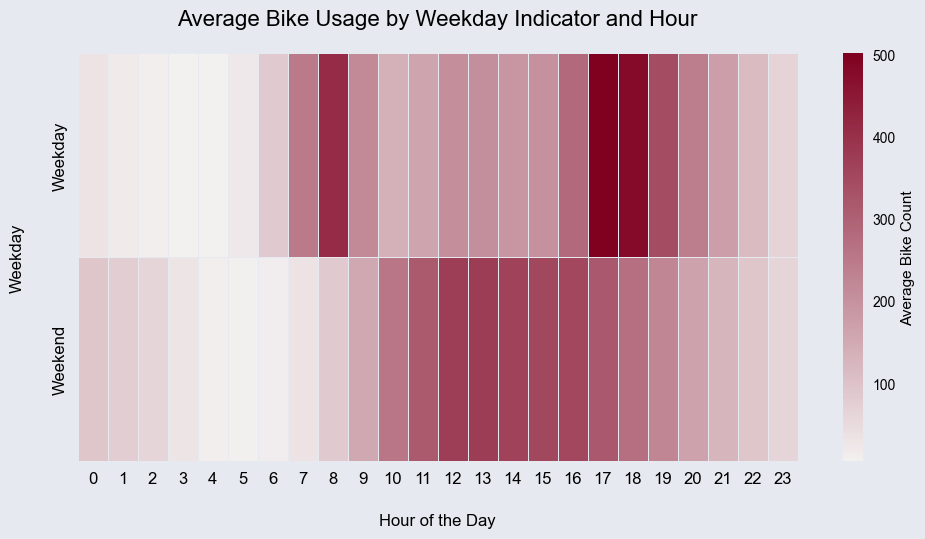

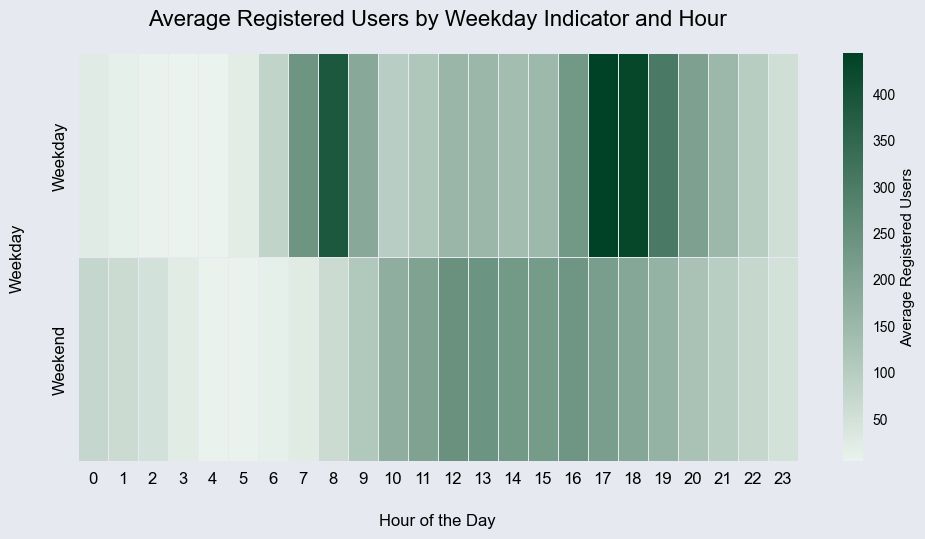

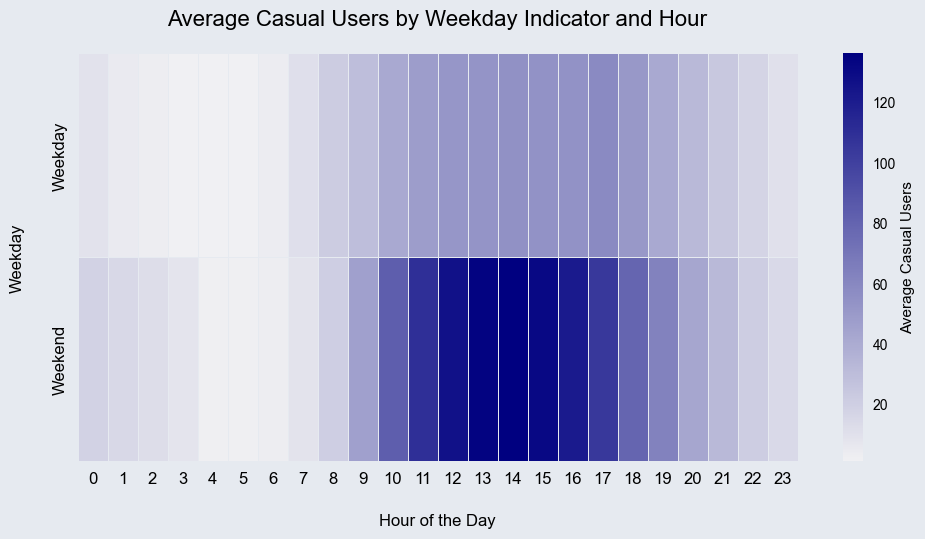

In [30]:
# Map the 'weekday' column to display as 'Weekday' for 1 and 'Weekend' for 0
df['weekday_label'] = df['weekday'].map({0: "Weekend", 1: "Weekday"})

# Calculate the average bike usage, registered users, and casual users by weekday label and hour
average_cnt = df.groupby(['hr', 'weekday_label'])['cnt'].mean().unstack()[["Weekday", "Weekend"]]
average_registered = df.groupby(['hr', 'weekday_label'])['registered'].mean().unstack()[["Weekday", "Weekend"]]
average_casual = df.groupby(['hr', 'weekday_label'])['casual'].mean().unstack()[["Weekday", "Weekend"]]

# Function to create a heatmap with specified color and label
def plot_heatmap(data, title, cbar_label, cmap_color):
    plt.figure(figsize=(12, 6))
    ax = sns.heatmap(
        data.T,  # Transpose data to flip axes
        cmap=sns.light_palette(cmap_color, as_cmap=True),
        cbar_kws={'label': cbar_label},
        linewidths=0.5,
        linecolor="#e6eaf0"
    )
    plt.title(title, color="#000000", fontsize=16, pad=20)
    plt.xlabel("Hour of the Day", color="#000000", fontsize=12, labelpad=20)
    plt.ylabel("Weekday", color="#000000", fontsize=12, labelpad=20)
    plt.xticks(color="#000000", fontsize=12)
    plt.yticks([0.5, 1.5], labels=["Weekday", "Weekend"], color="#000000", fontsize=12, va="center")
    plt.gcf().set_facecolor("#e6eaf0")
    plt.gca().set_facecolor("#e6eaf0")
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_tick_params(color="#000000")
    cbar.ax.yaxis.label.set_color("#000000")
    cbar.ax.tick_params(colors="#000000")  # Set color of cbar ticks to black
    plt.subplots_adjust(bottom=0.2, left=0.15)
    plt.show()

# Plot heatmaps for cnt, registered, and casual with specified colors
plot_heatmap(average_cnt, "Average Bike Usage by Weekday Indicator and Hour", "Average Bike Count", "#800020")
plot_heatmap(average_registered, "Average Registered Users by Weekday Indicator and Hour", "Average Registered Users", "#004225")
plot_heatmap(average_casual, "Average Casual Users by Weekday Indicator and Hour", "Average Casual Users", "#000080")


##### Heatmaps of Average Usage (Overall, Only Registered, Only Casual) by Weekday (x-axis) and hour (y-axis) (DROP-DOWN choice between Total and  Seasons)

In [31]:
# Re-Load the data to ensure data quality for this heatmap which requires specific inputs
data = pd.read_csv("hour.csv")

# Map 'weekday' column to labels
data['weekday_label'] = data['weekday'].map({0: "Weekend", 1: "Weekday", 2: "Weekday", 3: "Weekday", 
                                             4: "Weekday", 5: "Weekday", 6: "Weekend"})

# Map integer codes to season names
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
data['seasons'] = data['season'].map(season_mapping)

# Create an output widget to control the display of the plots
output = Output()

# Function to calculate average values and create heatmaps based on filtered data
def plot_seasonal_heatmaps(season):
    with output:
        # Clear previous output to avoid duplicate displays
        clear_output(wait=True)
        
        # Filter data by season if not "total"
        if season != "total":
            df_filtered = data[data['seasons'] == season]
        else:
            df_filtered = data

        # Group data by hour, weekday label, and calculate means
        average_cnt = df_filtered.groupby(['hr', 'weekday_label'])['cnt'].mean().unstack()[["Weekday", "Weekend"]]
        average_registered = df_filtered.groupby(['hr', 'weekday_label'])['registered'].mean().unstack()[["Weekday", "Weekend"]]
        average_casual = df_filtered.groupby(['hr', 'weekday_label'])['casual'].mean().unstack()[["Weekday", "Weekend"]]

        # Titles based on the season selected
        season_title = f"{season.capitalize()} Season" if season != "total" else "All Seasons"
        
        # Define heatmap function with dynamic titles
        def plot_heatmap(data, cbar_label, title, cmap_color):
            plt.figure(figsize=(12, 6))
            ax = sns.heatmap(data.T, cmap=sns.light_palette(cmap_color, as_cmap=True),
                             cbar_kws={'label': cbar_label}, linewidths=0.5, linecolor="#e6eaf0")
            ax.collections[0].colorbar.ax.tick_params(color="#000000")
            ax.collections[0].colorbar.ax.yaxis.set_tick_params(color="#000000")
            ax.set_facecolor("#e6eaf0")
            plt.gcf().set_facecolor("#e6eaf0")
            plt.title(f"{title} ({season_title})", color="#000000", fontsize=16, pad=20)
            plt.xlabel("Hour of the Day", color="#000000", fontsize=12, labelpad=20)
            plt.ylabel("Weekday", color="#000000", fontsize=12, labelpad=20)
            plt.xticks(color="#000000", fontsize=12)
            plt.yticks([0.5, 1.5], labels=["Weekday", "Weekend"], color="#000000", fontsize=12, va="center")
            plt.show()
            plt.close()  # close the plot to prevent duplicate displays

        # Plot the heatmaps with updated titles
        plot_heatmap(average_cnt, "Average Bike Count", "Average Bike Usage by Weekday Indicator and Hour", "#800020")
        plot_heatmap(average_registered, "Average Registered Users", "Average Registered Users by Weekday Indicator and Hour", "#004225")
        plot_heatmap(average_casual, "Average Casual Users", "Average Casual Users by Weekday Indicator and Hour", "#000080")

# Create an interactive dropdown menu for season selection and link it to the output widget
season_dropdown = widgets.Dropdown(
    options=["total", "spring", "summer", "fall", "winter"], 
    value="total",
    description="Season:"
)

# Update the output based on the dropdown selection
season_dropdown.observe(lambda change: plot_seasonal_heatmaps(change.new), names='value')

# Display the dropdown and the output widget
display(season_dropdown, output)

Dropdown(description='Season:', options=('total', 'spring', 'summer', 'fall', 'winter'), value='total')

Output()

#### Heatmap Interpretation

<div style="background-color: #006400; color: white; padding: 10px; border-radius: 5px;">
Interpretation:

- We can see that a key difference between Registered and Casual users is that, relatively speaking, casual users are "heavier" in their usage of the bikes during the early afternoon period of the non-working days (Saturday and Sunday), while Registered users, while also using on weekends around the same time (and in absolute numbers also more), are "heavier" in their usage during working days. Specifically, they reach their peak usage during the morning and afternoon rush times (relatively even on all working days). 

- This implies that the bike sharing service is primarily used as a means of workplace commute transportation, thus giving validity to our approach of splitting the days into "shifts" that include specifically these rush hours, but it also has some potential business implications. First, it showcases, again, that registered users are not only the more "valuable" target group (in terms of average usage) but also display different usage patterns from the casual user group, which suggests that catering to both target groups needs could be possible without major trade-offs (i.e. usage of registered is relatively low while usage of casuals is relatively high and vice versa). 

- Second, this could indicate that shifting more physical resources (i.e. bikes) closer to residential areas over night during working days and towards recreational areas during non-working days could be economically sensible for the company.
</div>

 

Drop `weekday_label`which was created for the last heatmap

In [32]:
df = df.drop(columns='weekday_label')

### Preparing Data Structure prior to Model Selection (Pycaret)

#### Dropping Features used to create new ones 

To prevent the model to pick two features from the same style

In [33]:
# Assuming registered and casual are not part of the model
df = df.drop(columns=["casual","registered"])

In [34]:
# Dropping binary categorical columns for created text columns and normalized columns
df = df.drop(columns=['yr',
 'mnth',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'season',
 'weekday',
 'weathersit'])

#### Ensuring proper datatype for different variables

In [35]:
# Convert holiday and Year into object to run a smooth OHE
df = df.astype({
    "holiday": object,
    "Year": object,
    "workingday":object,
    'Daylight' : object,
    'hr': object
})

### Outlier Removal

In [36]:
outlier_columns = ['cnt','real_windspeed', 'Previous_Count', 'Previous_Shift_Mean','Previous_Day']

In [37]:
def drop_outliers_iqr(df, columns=None,multiplier = 3):

    if columns is None:
        columns = df.select_dtypes(include='number').columns  # Apply to all numeric columns if none specified
    
    # Calculate Q1, Q3, and IQR for each specified column
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    
    # Construct a mask to filter rows
    mask = ((df[columns] >= (Q1 - multiplier * IQR)) & (df[columns] <= (Q3 + multiplier * IQR))).all(axis=1)
    
    # Return DataFrame with preserved index
    return df[mask].reset_index(drop=True)

# Drop outliers
df_final = drop_outliers_iqr(df,outlier_columns)

In [38]:
# Calculate and print the percentage of rows considered outliers
num_outliers = len(df) - len(df_final)
percent_outliers = (num_outliers / len(df)) * 100
print(f"Percentage of rows considered outliers: {percent_outliers:.2f}%")

Percentage of rows considered outliers: 0.06%


## PART II: Prediction Model

### Preparation for Pycaret Setup

In [39]:
# Replace spaces with underscores to ensure no troubleshooting with Pycaret
df_final.columns = df.columns.str.replace(' ', '_')

In [40]:
# List of categorical columns
categorical_columns = df_final.select_dtypes(include=['object']).columns.tolist()

# List of numerical columns
numerical_columns = df_final.select_dtypes(include=['number']).columns.drop("cnt").tolist()

In [41]:
df_final.head()

date hr holiday workingday  cnt Daylight seasons weather  Year  \
0 2011-01-02  0       0          0   17       No  spring   Misty  2011   
1 2011-01-02  1       0          0   17       No  spring   Misty  2011   
2 2011-01-02  2       0          0    9       No  spring   Misty  2011   
3 2011-01-02  3       0          0    6       No  spring   Misty  2011   
4 2011-01-02  4       0          0    3       No  spring   Misty  2011   

     Month  ... real_windspeed Previous_Count Previous_Shift_Mean  \
0  January  ...           20.0           39.0           31.833333   
1  January  ...           17.0           17.0           28.500000   
2  January  ...           19.0           17.0           24.000000   
3  January  ...           13.0            9.0           19.333333   
4  January  ...           13.0            6.0           15.166667   

   Previous_Day  month_sin  month_cos       day_sin  day_cos  hour_sin  \
0          16.0        0.5   0.866025 -2.449294e-16      1.0  0.000000   
1          40.0        0.5   0.866025 -2.449294e-16      1.0  0.258819   
2          32.0        0.5   0.866025 -2.449294e-16      1.0  0.500000   
3          13.0        0.5   0.866025 -2.449294e-16      1.0  0.707107   
4           1.0        0.5   0.866025 -2.449294e-16      1.0  0.866025   

   hour_cos  
0  1.000000  
1  0.965926  
2  0.866025  
3  0.707107  
4  0.500000  

[5 rows x 26 columns]

### Pycaret Setup

In [42]:
# Pycaret Setup

model = setup(
    
    #Basic
    data = df_final, #Index was set at date for Dataviz purposes, but Pycaret needs default index format
    target = "cnt",
    train_size = 0.8, # Train size of 80%

    preprocess = True,
    categorical_features = categorical_columns, #This runs OHE for multiclass categories and Ordinal for binary categories
    numeric_features= numerical_columns, #Features will be standarized via Standard Scaler based on zscore method
    
    #Feature Normalization
    normalize=True,
    normalize_method='zscore',

    #Transformation
    transformation = True,
    transformation_method='yeo-johnson', #Ensure proper handling of values and normalize the distribution

    # Dimensionality Reduction
    pca = False, #Not desired

    #Multicollinearity
    remove_multicollinearity=True,
    multicollinearity_threshold=0.80,#Features showing correlation of 80% or above are dropped

    #Feature Selection
    feature_selection=True,
    feature_selection_method="classic",
    n_features_to_select =0.50, #SelectFromModel function from scikit-learn: top 50% of features will be used

    #Time Series Considerations
    data_split_shuffle = False,
    fold_strategy = 'timeseries',
    fold = 8,

    #Paralellization Options
    n_jobs = -1,
    use_gpu= False,    
    
    html = True,
    session_id = None
)

### Model Comparison based on Root Mean Squared Error and 5 folds of cross validation

In [43]:
models = compare_models(sort = "RMSE", exclude=['et'],fold=5) #et is included because it sets the metrics to 1.0 and most of other functions below do not work properly with et

#### Extract Model Name

In [44]:
# Manually map the short names to model classes
model_mapping = {
    'lr': 'LinearRegression',
    'lasso': 'Lasso',
    'ridge': 'Ridge',
    'en': 'ElasticNet',
    'lar': 'Lars',
    'llar': 'LassoLars',
    'omp': 'OrthogonalMatchingPursuit',
    'br': 'BayesianRidge',
    'ard': 'ARDRegression',
    'par': 'PassiveAggressiveRegressor',
    'ransac': 'RANSACRegressor',
    'tr': 'TheilSenRegressor',
    'huber': 'HuberRegressor',
    'kr': 'KernelRidge',
    'svm': 'SVR',
    'knn': 'KNeighborsRegressor',
    'dt': 'DecisionTreeRegressor',
    'rf': 'RandomForestRegressor',
    'et': 'ExtraTreesRegressor',
    'ada': 'AdaBoostRegressor',
    'gbr': 'GradientBoostingRegressor',
    'mlp': 'MLPRegressor',
    'xgboost': 'XGBRegressor',
    'lightgbm': 'LGBMRegressor',
    'catboost': 'CatBoostRegressor',
}


# Find the short name for the best model
for short_name, model_name in model_mapping.items():
    if type(models).__name__ == model_name:
        best_model_short_name = short_name
        break

best_model_short_name.__str__

best_model_short_name

'catboost'

### Create best model based on model selected after comparison

In [45]:
best_model = create_model(best_model_short_name, fold = 5, round = 2)

Initiated  . . . . . . . . . . . . . . . . . .              17:15:34
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

### Tune Model with default hyperparameter tuning values

In [46]:
tuned_model = tune_model(best_model,optimize="RMSE")

Fitting 8 folds for each of 10 candidates, totalling 80 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Finalize Model & Predict

In [47]:
# Finalize the model to make it ready for predictions
final_model = finalize_model(tuned_model)

In [48]:
predictions = predict_model(final_model,df_final.reset_index())

In [49]:
# Ensure non-negative and rounded predictions
if 'prediction_label' in predictions.columns:
    predictions['prediction_label'] = predictions['prediction_label'].apply(lambda x: max(round(x, 0), 0))
else:
    print("Error: 'prediction_label' column not found in predictions.")



### Model Metrics

In [50]:
final_model = finalize_model(tuned_model)

# Combine X_train and y_train to create a full training dataset
X_train = get_config('X_train')
y_train = get_config('y_train')
train_data = pd.concat([X_train, y_train], axis=1)

# Combine X_test and y_test to create a full test dataset
X_test = get_config('X_test')
y_test = get_config('y_test')
test_data = pd.concat([X_test, y_test], axis=1)

# Train metrics
train_predictions = predict_model(final_model, data=train_data)
train_metrics = pull()
print("Training Metrics:")
print(train_metrics)

# Test metrics
test_predictions = predict_model(final_model, data=test_data)
test_metrics = pull()
print("\nTest Metrics:")
print(test_metrics)


Training Metrics:
                Model      MAE       MSE     RMSE      R2   RMSLE    MAPE
0  CatBoost Regressor  15.9285  569.8122  23.8707  0.9796  0.3004  0.2577



Test Metrics:
                Model      MAE       MSE     RMSE     R2   RMSLE    MAPE
0  CatBoost Regressor  19.2758  822.6081  28.6811  0.983  0.2615  0.1915


In [51]:
# Number of observations and predictors for train and test data
n_train = train_data.shape[0]  # Number of observations in the training data
n_test = test_data.shape[0]    # Number of observations in the test data
p = X_train.shape[1]           # Number of predictors (features)

# Extract R^2 from metrics
R2_train = train_metrics['R2']
R2_test = test_metrics['R2']

# Calculate Adjusted R^2 for training data
adjusted_R2_train = 1 - ((1 - R2_train) * (n_train - 1)) / (n_train - p - 1)

# Calculate Adjusted R^2 for test data
adjusted_R2_test = 1 - ((1 - R2_test) * (n_test - 1)) / (n_test - p - 1)

# Print Adjusted R^2 values
print("\nAdjusted R^2 (Training):", adjusted_R2_train)
print("Adjusted R^2 (Testing):", adjusted_R2_test)



Adjusted R^2 (Training): 0    0.979563
Name: R2, dtype: float64
Adjusted R^2 (Testing): 0    0.982877
Name: R2, dtype: float64


### Model Features

In [52]:
print(final_model.feature_names_)

['date_day', 'hr_17.0', 'workingday', 'Year', 'quarter_Q3', 'real_temp', 'real_hum', 'real_windspeed', 'Previous_Count', 'Previous_Day', 'day_sin', 'hour_sin', 'hour_cos']


In [53]:
final_model.feature_importances_

array([ 0.27221604,  3.00068522,  7.59205174,  1.3289604 ,  0.13386483,
        1.70395077,  0.96805693,  0.41085968, 39.04312022, 12.64446153,
        1.82216635,  9.68312864, 21.39647765])

In [54]:
# Creating a DataFrame for better handling with Plotly
ftimp = pd.DataFrame({
    'Feature': final_model.feature_names_,
    'Importance': final_model.feature_importances_
})

# Sorting the data by importance in descending order
ftimp = ftimp.sort_values(by='Importance', ascending=False)

# Plotting with Plotly
fig = px.bar(ftimp, x='Feature', y='Importance', title='Feature Importance')
             #labels={'Importance': 'Importance'}, text='Importance')

fig.update_layout(xaxis_title='Features',
                  yaxis_title='Importance',
                  xaxis=dict(tickangle=-90))  # Making x-axis labels vertical

fig.show()


### Save Model

In [55]:
# We save the model
pipeline = save_model(final_model, 'model_f3')

Transformation Pipeline and Model Successfully Saved


### Prediction Graphs

#### General Inspection

In [56]:
predictions.head(3)

index       date hr holiday workingday Daylight seasons weather  Year  \
0      0 2011-01-02  0       0          0       No  spring   Misty  2011   
1      1 2011-01-02  1       0          0       No  spring   Misty  2011   
2      2 2011-01-02  2       0          0       No  spring   Misty  2011   

     Month  ... Previous_Shift_Mean Previous_Day month_sin  month_cos  \
0  January  ...           31.833334         16.0       0.5   0.866025   
1  January  ...           28.500000         40.0       0.5   0.866025   
2  January  ...           24.000000         32.0       0.5   0.866025   

        day_sin  day_cos  hour_sin  hour_cos  cnt  prediction_label  
0 -2.449294e-16      1.0  0.000000  1.000000   17              33.0  
1 -2.449294e-16      1.0  0.258819  0.965926   17              24.0  
2 -2.449294e-16      1.0  0.500000  0.866025    9              12.0  

[3 rows x 28 columns]

In [57]:
predictions.isnull().sum().sum()

0

In [58]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17345 entries, 0 to 17344
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                17345 non-null  int32         
 1   date                 17345 non-null  datetime64[ns]
 2   hr                   17345 non-null  category      
 3   holiday              17345 non-null  category      
 4   workingday           17345 non-null  category      
 5   Daylight             17345 non-null  category      
 6   seasons              17345 non-null  category      
 7   weather              17345 non-null  category      
 8   Year                 17345 non-null  category      
 9   Month                17345 non-null  category      
 10  Day                  17345 non-null  category      
 11  shift                17345 non-null  category      
 12  quarter              17345 non-null  category      
 13  real_temp            17345 non-

#### Time Series of Prediction vs Actual, and Residual Plots

In [59]:
# 1. Time Series Plot for Actual vs Predicted Counts
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=predictions['date'], y=predictions['cnt'],
                          mode='lines', name='Actual Count',
                          line=dict(color='blue')))
fig1.add_trace(go.Scatter(x=predictions['date'], y=predictions['prediction_label'],
                          mode='lines', name='Predicted Count',
                          line=dict(color='red')))

fig1.update_layout(
    title='Actual vs Predicted Counts Over Time',
    xaxis_title='Date',
    yaxis_title='Bike Count',
    template='plotly_white'
)
fig1.show()

# 2. Residual Plot (Residuals = Actual - Predicted)
predictions['residuals'] = predictions['cnt'] - predictions['prediction_label']
fig2 = px.scatter(predictions, x='date', y='residuals',
                  title='Residual Plot (Actual - Predicted)',
                  labels={'date': 'Date', 'residuals': 'Residuals'})
fig2.update_traces(marker=dict(color='orange'))
fig2.update_layout(template='plotly_white')
fig2.show()

# 3. Scatter Plot for Predicted vs Actual Counts
# Calculating R2 value
r2_value = r2_score(predictions['cnt'], predictions['prediction_label'])

# Adding R2 value to fig3
fig3 = px.scatter(predictions, x='cnt', y='prediction_label',
                  title=f'Predicted vs Actual Counts (R²: {r2_value:.2f})',
                  labels={'cnt': 'Actual Count', 'prediction_label': 'Predicted Count'})
fig3.add_shape(
    type='line', x0=predictions['cnt'].min(), y0=predictions['cnt'].min(), 
    x1=predictions['cnt'].max(), y1=predictions['cnt'].max(),
    line=dict(color='green', dash='dash')
)
fig3.update_traces(marker=dict(color='purple'))
fig3.update_layout(template='plotly_white')

# Display the updated plot
fig3.show()

#### Split Predicted vs Actual 

Store MAE Values

In [60]:
training_mae = train_metrics['MAE'].iloc[0]
test_mae = test_metrics['MAE'].iloc[0]

##### Last 30 days of dataframe

In [61]:
# Taking only the last 720 rows for a 24-hour x 30-day period and plotting only the predictions
last_720 = predictions.tail(720)

In [62]:
# Create a Plotly figure
fig = go.Figure()
# Add predicted counts line
fig.add_trace(go.Scatter(
    x=last_720['date'],
    y=last_720['prediction_label'],
    mode='lines',
    name='Predicted Count',
    line=dict(color='red', width=1.5)
))
# Add upper bound line
fig.add_trace(go.Scatter(
    x=last_720['date'],
    y=last_720['prediction_label'] + test_mae,
    mode='lines',
    name='Upper Bound (Test MAE)',
    line=dict(color='orange', dash='dash')
))
# Add lower bound line
fig.add_trace(go.Scatter(
    x=last_720['date'],
    y=last_720['prediction_label'] - test_mae,
    mode='lines',
    name='Lower Bound (Test MAE)',
    line=dict(color='orange', dash='dash')
))
# Update layout
fig.update_layout(
    title='Predicted Counts Over Time with Upper and Lower Bounds (Last 30 Days)',
    xaxis_title='Date',
    yaxis_title='Predicted Bike Count',
    template='plotly_white',
    showlegend=True
)
# Show the plot
fig.show()

#### Split & Grouped Sum of Actual vs Predicted

##### Predicted Grouped Sum Last 30 days

In [63]:
# Aggregating the data into six-hour shifts by taking the sum within each period
last_720['six_hour_shift'] = last_720['date'].dt.floor('6H')
six_hour_max = last_720.groupby('six_hour_shift')['prediction_label'].sum().reset_index()

# Create a Plotly figure
fig = go.Figure()

# Add the six-hour max predicted count line
fig.add_trace(go.Scatter(
    x=six_hour_max['six_hour_shift'],
    y=six_hour_max['prediction_label'],
    mode='lines',
    name='Six-Hour Max Predicted Count',
    line=dict(color='green', width=2)
))

# Update layout
fig.update_layout(
    title='Six-Hour Aggregated Maximum Predicted Counts Over Time (Last 30 Days)',
    xaxis_title='Date',
    yaxis_title='Max Predicted Bike Count (Six-Hour Period)',
    template='plotly_white',
    showlegend=True,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

# Show the plot
fig.show()


##### Predicted Grouped Sum Last 30 days with MAPE bounds

In [64]:
test_mape = test_metrics['MAPE'].iloc[0]

In [65]:
# Calculating the MAPE margin for each aggregated value
six_hour_max['upper_mape_margin'] = six_hour_max['prediction_label'] * (1 + test_mape)
six_hour_max['lower_mape_margin'] = six_hour_max['prediction_label'] * (1 - test_mape)

# Create a Plotly figure
fig = go.Figure()

# Add the six-hour max predicted count line
fig.add_trace(go.Scatter(
    x=six_hour_max['six_hour_shift'],
    y=six_hour_max['prediction_label'],
    mode='lines',
    name='Six-Hour Sum Predicted Count',
    line=dict(color='green', width=2)
))

# Add upper MAPE margin line
fig.add_trace(go.Scatter(
    x=six_hour_max['six_hour_shift'],
    y=six_hour_max['upper_mape_margin'],
    mode='lines',
    name='Upper Bound (MAPE Margin)',
    line=dict(color='orange', dash='dash')
))

# Add lower MAPE margin line
fig.add_trace(go.Scatter(
    x=six_hour_max['six_hour_shift'],
    y=six_hour_max['lower_mape_margin'],
    mode='lines',
    name='Lower Bound (MAPE Margin)',
    line=dict(color='orange', dash='dash')
))

# Update layout
fig.update_layout(
    title='Six-Hour Aggregated Sum Predicted Counts Over Time with MAPE Margins (Last 30 Days)',
    xaxis_title='Date',
    yaxis_title='Max Predicted Bike Count (Six-Hour Period)',
    template='plotly_white',
    showlegend=True,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

# Show the plot
fig.show()


##### Predicted vs. Actual Grouped Sum Last 30 days

In [66]:
# Plotting with real data added to the six-hour aggregation plot
last_720['six_hour_shift'] = last_720['date'].dt.floor('6H')
six_hour_actual_sum = last_720.groupby('six_hour_shift')['cnt'].sum().reset_index()

# Create a Plotly figure
fig = go.Figure()

# Add the six-hour sum prediction line
fig.add_trace(go.Scatter(
    x=six_hour_max['six_hour_shift'],
    y=six_hour_max['prediction_label'],
    mode='lines',
    name='Six-Hour Sum Predicted Count',
    line=dict(color='green', width=2)
))

# Add upper MAPE margin line
fig.add_trace(go.Scatter(
    x=six_hour_max['six_hour_shift'],
    y=six_hour_max['upper_mape_margin'],
    mode='lines',
    name='Upper Bound (MAPE Margin)',
    line=dict(color='orange', dash='dash')
))

# Add lower MAPE margin line
fig.add_trace(go.Scatter(
    x=six_hour_max['six_hour_shift'],
    y=six_hour_max['lower_mape_margin'],
    mode='lines',
    name='Lower Bound (MAPE Margin)',
    line=dict(color='orange', dash='dash')
))

# Add the actual 'cnt' data line (aggregated by six-hour sum)
fig.add_trace(go.Scatter(
    x=six_hour_actual_sum['six_hour_shift'],
    y=six_hour_actual_sum['cnt'],
    mode='lines',
    name='Six-Hour Sum Actual Count',
    line=dict(color='blue', width=2)
))

# Update layout
fig.update_layout(
    title='Six-Hour Aggregated Sum Predicted and Actual Counts Over Time with MAPE Margins (Last 30 Days)',
    xaxis_title='Date',
    yaxis_title='Sum Bike Count (Six-Hour Period)',
    template='plotly_white',
    showlegend=True,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

# Show the plot
fig.show()


##### Predicted Grouped Sum First 30 and Middle 90 days

In [67]:
first_720 = predictions.head(720)
middle_2880 = predictions.iloc[4320:7200]  # Selecting the middle 90 days (2880 rows)

In [68]:
# Function to plot six-hour aggregation
def plot_six_hour_aggregation(data, title_suffix):
    # Aggregating data for six-hour sum values
    data['six_hour_shift'] = data['date'].dt.floor('6H')
    six_hour_sum = data.groupby('six_hour_shift')['prediction_label'].sum().reset_index()
    six_hour_actual_sum = data.groupby('six_hour_shift')['cnt'].sum().reset_index()

    # Calculating MAPE margins
    six_hour_sum['upper_mape_margin'] = six_hour_sum['prediction_label'] * (1 + test_mape)
    six_hour_sum['lower_mape_margin'] = six_hour_sum['prediction_label'] * (1 - test_mape)

    # Create a Plotly figure
    fig = go.Figure()

    # Add the six-hour sum prediction line
    fig.add_trace(go.Scatter(
        x=six_hour_sum['six_hour_shift'],
        y=six_hour_sum['prediction_label'],
        mode='lines',
        name='Six-Hour Sum Predicted Count',
        line=dict(color='green', width=2)
    ))

    # Add upper MAPE margin line
    fig.add_trace(go.Scatter(
        x=six_hour_sum['six_hour_shift'],
        y=six_hour_sum['upper_mape_margin'],
        mode='lines',
        name='Upper Bound (MAPE Margin)',
        line=dict(color='orange', dash='dash')
    ))

    # Add lower MAPE margin line
    fig.add_trace(go.Scatter(
        x=six_hour_sum['six_hour_shift'],
        y=six_hour_sum['lower_mape_margin'],
        mode='lines',
        name='Lower Bound (MAPE Margin)',
        line=dict(color='orange', dash='dash')
    ))

    # Add the actual 'cnt' data line (aggregated by six-hour sum)
    fig.add_trace(go.Scatter(
        x=six_hour_actual_sum['six_hour_shift'],
        y=six_hour_actual_sum['cnt'],
        mode='lines',
        name='Six-Hour Sum Actual Count',
        line=dict(color='blue', width=2)
    ))

    # Update layout
    fig.update_layout(
        title=f'Six-Hour Aggregated Sum Predicted and Actual Counts Over Time with MAPE Margins ({title_suffix})',
        xaxis_title='Date',
        yaxis_title='Sum Bike Count (Six-Hour Period)',
        template='plotly_white',
        showlegend=True,
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True)
    )

    # Show the plot
    fig.show()

# Plotting for the first 720 rows (first 30 days)
plot_six_hour_aggregation(first_720, "First 30 Days")

# Plotting for the middle 2880 rows (middle 90 days)
plot_six_hour_aggregation(middle_2880, "Middle 90 Days")


### Predictions dataframe export

In [69]:
predictions.head(2)

index       date hr holiday workingday Daylight seasons weather  Year  \
0      0 2011-01-02  0       0          0       No  spring   Misty  2011   
1      1 2011-01-02  1       0          0       No  spring   Misty  2011   

     Month  ... Previous_Day month_sin month_cos       day_sin  day_cos  \
0  January  ...         16.0       0.5  0.866025 -2.449294e-16      1.0   
1  January  ...         40.0       0.5  0.866025 -2.449294e-16      1.0   

   hour_sin  hour_cos  cnt  prediction_label  residuals  
0  0.000000  1.000000   17              33.0      -16.0  
1  0.258819  0.965926   17              24.0       -7.0  

[2 rows x 29 columns]

In [70]:
# Exporting the DataFrame to a CSV file
df.to_csv('predictions.csv') # This will be used in the streamlit to replicate these graphs

## PART III: Streamlit dashboard

In [71]:
end_time = time.time()
print(f"Total runtime: {round((end_time - start_time)/60)} minutes")

Total runtime: 9 minutes


In [72]:
### This part goes in a separate script ###